In [1]:
import pandas as pd
import requests
import json
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib import rcParams


**Choosing cities to do a research**
<br>Total cities in the Bay Area: 101
<br>Total Counties in the Bay Area: 9
<br>For the families one of the major factors is school ratings. Total cities/towns with A+/A- school ratings, according to niche.com: 25
url: https://www.niche.com/k12/search/best-school-districts/m/san-francisco-metro-area/?map=true



# Unemployment Data


In [2]:
#unemployment rates in Bay Area Counties
unemploymentdf = pd.read_csv('/Users/baytech11/Downloads/unemployment rate counties.csv')

#updating ID Values to County names
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060010000000004': 'Alameda County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060130000000004': 'Contra Costa County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060410000000004': 'Marin County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060750000000004': 'San Francisco County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060550000000004': 'Napa County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060950000000003': 'Solano County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060970000000003': 'Sonoma County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060810000000004': 'San Mateo County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUCN060850000000004': 'Santa Clara County'})
unemploymentdf['Series ID'] = unemploymentdf['Series ID'].replace({'LAUST060000000000003': 'California State'})

# writing into the file
unemploymentdf.to_csv("unemployment rate counties.csv", index=False)
print(unemploymentdf)

             Series ID  Year Period     Label  Value
0     California State  2000    M01  2000 Jan    5.0
1     California State  2000    M02  2000 Feb    5.0
2     California State  2000    M03  2000 Mar    5.0
3     California State  2000    M04  2000 Apr    5.0
4     California State  2000    M05  2000 May    5.0
...                ...   ...    ...       ...    ...
2735     Sonoma County  2022    M06  2022 Jun    2.7
2736     Sonoma County  2022    M07  2022 Jul    2.6
2737     Sonoma County  2022    M08  2022 Aug    2.8
2738     Sonoma County  2022    M09  2022 Sep    2.6
2739     Sonoma County  2022    M10  2022 Oct    2.6

[2740 rows x 5 columns]


In [3]:
unemploymentdf.columns

Index(['Series ID', 'Year', 'Period', 'Label', 'Value'], dtype='object')

In [4]:
unemploymentdf.head()

,Series ID,Year,Period,Label,Value
0,California State,2000,M01,2000 Jan,5.0
1,California State,2000,M02,2000 Feb,5.0
2,California State,2000,M03,2000 Mar,5.0
3,California State,2000,M04,2000 Apr,5.0
4,California State,2000,M05,2000 May,5.0


In [5]:
#checking if there is any missing values
unemploymentdf.isnull().values.any()

False

In [6]:
# changing column names for Series ID and 3-Month Net Change, that there would be no spaces
unemploymentdf.rename(columns = {'Series ID':'Series_ID'}, inplace = True)
unemploymentdf.rename(columns = {'3-Month Net Change':'3Month_Net_Change'}, inplace = True)

In [7]:
unemploymentdf.head()

,Series_ID,Year,Period,Label,Value
0,California State,2000,M01,2000 Jan,5.0
1,California State,2000,M02,2000 Feb,5.0
2,California State,2000,M03,2000 Mar,5.0
3,California State,2000,M04,2000 Apr,5.0
4,California State,2000,M05,2000 May,5.0


In [8]:
# changing date format
unemploymentdf['Label']=pd.to_datetime(unemploymentdf['Label'], format = "%Y %b")

In [9]:
pd.to_datetime(unemploymentdf['Label'], format = "%Y %b")

0      2000-01-01
1      2000-02-01
2      2000-03-01
3      2000-04-01
4      2000-05-01
          ...    
2735   2022-06-01
2736   2022-07-01
2737   2022-08-01
2738   2022-09-01
2739   2022-10-01
Name: Label, Length: 2740, dtype: datetime64[ns]

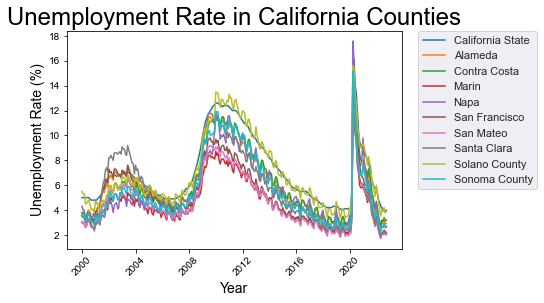

In [10]:
#showing results in the timeseries graph
sns.lineplot(x = 'Label', y = 'Value', data = unemploymentdf, hue='Series_ID')
sns.set(rc={'figure.figsize':(20,15)})
fontsize = 24
fontsize1 = 14
plt.title("Unemployment Rate in California Counties", fontsize=fontsize)
plt.xticks(rotation = 45)
plt.xlabel("Year", fontdict={'fontsize': fontsize1})
plt.ylabel("Unemployment Rate (%)", fontdict={'fontsize': fontsize1})
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# School Ratings Data

In [11]:
# creating table of cities/towns in Bay Area with A+, A, A- school rating by districs.
#from prettytable import PrettyTable
 
# Specifying the Column Names while initializing the Table
#bestSchools = PrettyTable(["District", "City or Town", "County","Rating"])
 
lst = [["Tamalpais", "Larkspur", "Marin", "A+"],["San Francisco", "San Francisco", "San Francisco", "A-"],
["San Mateo", "San Mateo", "San Mateo", "A+"],["Sequoia", "Redwood", "San Mateo", "A"],
["Palo Alto", "Palo Alto", "Santa Clara", "A+"],
["Mountain View", "Mountain View", "Santa Clara", "A+"],
["Fremont", "Sunnyvale", "Santa Clara", "A+"],
["Santa Clara", "Santa Clara", "Santa Clara", "A"],
["Los Gatos", "Los Gatos", "Santa Clara", "A+"],
["Campbell", "San Jose", "Santa Clara", "A-"],
["Milpitas", "Milpitas", "Santa Clara", "A-"],
["Fremont", "Fremont", "Alameda", "A"],
["Pleasanton", "Pleasanton", "Alameda","A+"],
["Livermore", "Livermore", "Alameda", "A-"],
["Dublin", "Dublin", "Alameda", "A+"],
["Castro Valley", "Castro Valley", "Alameda", "A"],
["Alameda", "Alameda", "Alameda", "A"],
["Piedmont", "Piedmont", "Alameda", "A+"],
["Albany", "Berkeley", "Alameda", "A+"],
["Berkeley", "Berkeley", "Alameda", "A+"],
["Acalanes", "Lafayette", "Contra Costa", "A+"],
["Martinez", "Martinez", "Contra Costa", "A-"],
["Benicia", "Benicia", "Solano", "A-"],
["Brentwood", "Brentwood", "Contra Costa", "A-"]]

schools_data = pd.DataFrame(lst, columns =['District', 'City or Town', 'County', 'Rating'], dtype = float)

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
schools_data.head()

,District,City or Town,County,Rating
0,Tamalpais,Larkspur,Marin,A+
1,San Francisco,San Francisco,San Francisco,A-
2,San Mateo,San Mateo,San Mateo,A+
3,Sequoia,Redwood,San Mateo,A
4,Palo Alto,Palo Alto,Santa Clara,A+


In [13]:
#Saving colected data to csv file for future project EDA
schools_data.to_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone Project/prepared data/school_ratings', index=False)

# San Francisco Real Estate Data

In [14]:
# getting real estate data from Zilllow for all the cities listed in bestschools table.


In [15]:
rapid_api_key = pd.read_csv('zillow_api.csv')


In [16]:
rapid_api_key=rapid_api_key.iloc[0].iloc[0]

In [17]:
import requests

#rapid API provides only 40 results at single request. houses listed for the price up to $1M

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"

querystring1 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", 
               "maxPrice": "1000000", "sqfMax":"3000"}

headers = {
	"X-RapidAPI-Key": rapid_api_key,
	"X-RapidAPI-Host": "zillow-com1.p.rapidapi.com"
}

z_for_sale_san_francisco1 = requests.request("GET", url, headers=headers, params=querystring1)

# transform to json

df1 = z_for_sale_san_francisco1.json()
df1

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2665.872,
   'address': '33 Rio Ct, San Francisco, CA 94127',
   'variableData': {'text': 'Open: Sun. 1-3pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1051200,
   'imgSrc': 'https://photos.zillowstatic.com/fp/48ce7d2a9b1c9ff212aba408ea466bf9-p_e.jpg',
   'price': 988000,
   'bedrooms': 2,
   'contingentListingType': None,
   'longitude': -122.44567,
   'latitude': 37.738323,
   'listingStatus': 'FOR_SALE',
   'zpid': '15135056',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 4940,
   'daysOnZillow': -1,
   'bathrooms': 1,
   'livingArea': 1388,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'MULTI_FAMILY',
   'lotAreaValue': 1999.404,
   'address': '1034-1036 Natoma St, San Francisco, CA 94103',
   'variableData': {'text': '7 days on Zillow', 'type': 'DAYS_ON'},
 

In [18]:
df1 = pd.json_normalize(data=df1["props"])

In [19]:
#rapid API provides only 40 results at single request. houses listed for the price from $1M to $1.25M.

querystring2 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "1000001", "maxPrice": "1250000", "sqfMax":"3000"}

z_for_sale_san_francisco2 = requests.request("GET", url, headers=headers, params=querystring2)

# transform to json

df2 = z_for_sale_san_francisco2.json()
df2

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 3001.284,
   'address': '2241 17th Ave, San Francisco, CA 94116',
   'variableData': {'text': 'Open: Tue. 1-3pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1266700,
   'imgSrc': 'https://photos.zillowstatic.com/fp/958f75c1a6ed28226d1daec73e8b4a1f-p_e.jpg',
   'price': 1195000,
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.47408,
   'latitude': 37.74607,
   'listingStatus': 'FOR_SALE',
   'zpid': '15119807',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 4200,
   'daysOnZillow': -1,
   'bathrooms': 1,
   'livingArea': 1550,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 3001.284,
   'address': '1671 43rd Ave, San Francisco, CA 94122',
   'variableData': {'type': 'TIME_ON_INFO',
    'data': {'isFresh': Fa

In [20]:
df2 = pd.json_normalize(data=df2["props"])

In [21]:
# houses listed for the price from $1.25M to $1.5M.

querystring3 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "1250001", "maxPrice": "1500000", "sqfMax":"3000"}
z_for_sale_san_francisco3 = requests.request("GET", url, headers=headers, params=querystring3)

# transform to json

df3 = z_for_sale_san_francisco3.json()
df3

{'props': [{'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': 3750.516,
   'address': '2198 Fell St APT 5, San Francisco, CA 94117',
   'variableData': {'text': 'Open: Tue. 11am-12:30pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1286956,
   'imgSrc': 'https://photos.zillowstatic.com/fp/d33f08a6a815762efe62bb85afc5e191-p_e.jpg',
   'price': 1298000,
   'unit': 'Apt 5',
   'bedrooms': 2,
   'contingentListingType': None,
   'longitude': -122.45394,
   'latitude': 37.77222,
   'listingStatus': 'FOR_SALE',
   'zpid': '59779407',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 4500,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1210,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2060.388,
   'address': '88 Bernal Heights Blvd, San Francisco, CA 94110',
   'variableData': {'text': '$100,000

In [22]:
df3 = pd.json_normalize(data=df3["props"])

In [23]:
# houses listed for the price from $1.5M to $1.75M.

querystring4 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "1500001", "maxPrice": "1750000", "sqfMax":"3000"}
z_for_sale_san_francisco4 = requests.request("GET", url, headers=headers, params=querystring4)

# transform to json

df4 = z_for_sale_san_francisco4.json()
df4

{'props': [{'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': 3645.972,
   'address': '128 Wood St #3, San Francisco, CA 94118',
   'variableData': {'text': 'Open: Thu. 4-6pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1585220,
   'imgSrc': 'https://photos.zillowstatic.com/fp/103482f0634e949878f363b262fac74a-p_e.jpg',
   'price': 1590000,
   'unit': '# 3',
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.4486,
   'latitude': 37.781746,
   'listingStatus': 'FOR_SALE',
   'zpid': '15083911',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 5600,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1730,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': 3123.252,
   'address': '19 Chattanooga St, San Francisco, CA 94114',
   'variableData': {'text': '74 days on Zillow', 'type': 'DAYS_

In [24]:
df4 = pd.json_normalize(data=df4["props"])

In [25]:
# houses listed for the price from $1.75M to $2M.

querystring5 = {"location":"san francisco, ca","home_type":"Houses", "minPrice": "1750001", "maxPrice": "2000000", "sqfMax":"3000"}
z_for_sale_san_francisco5 = requests.request("GET", url, headers=headers, params=querystring5)

# transform to json
df5 = z_for_sale_san_francisco5.json()
df5

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2896.74,
   'address': '324 Hill St, San Francisco, CA 94114',
   'variableData': {'text': 'Open: Sun. 2-4pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1799013,
   'imgSrc': 'https://photos.zillowstatic.com/fp/5fff68f40a9c888adf550597fddf4ec4-p_e.jpg',
   'price': 1799000,
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.42864,
   'latitude': 37.755886,
   'listingStatus': 'FOR_SALE',
   'zpid': '15146170',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 5799,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1320,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2064.744,
   'address': '1686 30th Ave, San Francisco, CA 94122',
   'variableData': {'text': 'Open: Tue. 1-3pm', 'type': 'OPEN_HOUSE'},
 

In [26]:
df5 = pd.json_normalize(data=df5["props"])

In [27]:
# houses listed for the price from $2M to $2.25M.

querystring6 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "2000001", "maxPrice": "2250000", "sqfMax":"3000"}
z_for_sale_san_francisco6 = requests.request("GET", url, headers=headers, params=querystring6)

# transform to json

df6 = z_for_sale_san_francisco6.json()
df6

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 3484.8,
   'address': '200 Darien Way, San Francisco, CA 94127',
   'variableData': {'text': '$50,000 (Jan 4)', 'type': 'PRICE_REDUCTION'},
   'priceChange': -50000,
   'zestimate': 2151195,
   'imgSrc': 'https://photos.zillowstatic.com/fp/3a6cb5b0a449881a64264e0846a6587d-p_e.jpg',
   'price': 2199000,
   'bedrooms': 4,
   'contingentListingType': None,
   'longitude': -122.46936,
   'latitude': 37.731754,
   'listingStatus': 'FOR_SALE',
   'zpid': '15141566',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 6495,
   'daysOnZillow': -1,
   'bathrooms': 4,
   'livingArea': 2332,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2495.988,
   'address': '3536 22nd St, San Francisco, CA 94114',
   'variableData': {'text': '4 days on Zillow', 'type': 'DAYS_ON'},
   'priceChange': N

In [28]:
df6 = pd.json_normalize(data=df6["props"])

In [29]:
# houses listed for the price from $2.25M to $2.5M.

querystring7 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "2250001", "maxPrice": "2500000", "sqfMax":"3000"}
z_for_sale_san_francisco7 = requests.request("GET", url, headers=headers, params=querystring7)

# transform to json

df7 = z_for_sale_san_francisco7.json()
df7

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2626.668,
   'address': '506 Sanchez St, San Francisco, CA 94114',
   'variableData': {'text': '3D Tour', 'type': '3D_HOME'},
   'priceChange': None,
   'zestimate': 2422600,
   'imgSrc': 'https://photos.zillowstatic.com/fp/897279319b00c53b9fe0ec1e395928e2-p_e.jpg',
   'price': 2450000,
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.43088,
   'latitude': 37.76094,
   'listingStatus': 'FOR_SALE',
   'zpid': '15144449',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 9079,
   'daysOnZillow': -1,
   'bathrooms': 3,
   'livingArea': 2175,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 3545.784,
   'address': '148 Huntington Dr, San Francisco, CA 94132',
   'variableData': {'text': 'Open: Tue. 5-6pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   '

In [30]:
df7 = pd.json_normalize(data=df7["props"])

In [31]:
# houses listed for the price from $2.5M to $2.75M.

querystring8 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "2500001", "maxPrice": "2750000", "sqfMax":"3000"}
z_for_sale_san_francisco8 = requests.request("GET", url, headers=headers, params=querystring8)

# transform to json

df8 = z_for_sale_san_francisco8.json()
df8

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2571,
   'address': '421 Point Lobos Ave, San Francisco, CA 94121',
   'variableData': {'text': '$100,000 (Jan 5)', 'type': 'PRICE_REDUCTION'},
   'priceChange': -100000,
   'zestimate': 2567254,
   'imgSrc': 'https://photos.zillowstatic.com/fp/a215491a470688a8c1e4b1448645df2b-p_e.jpg',
   'price': 2588000,
   'bedrooms': 4,
   'contingentListingType': None,
   'longitude': -122.50772,
   'latitude': 37.779625,
   'listingStatus': 'FOR_SALE',
   'zpid': '15092883',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 6195,
   'daysOnZillow': -1,
   'bathrooms': 5,
   'livingArea': 2361,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 1816.452,
   'address': '3027 Webster St, San Francisco, CA 94123',
   'variableData': {'text': 'Open: Sun. 2-4pm', 'type': 'OPEN_HOUSE'},
   'pric

In [32]:
df8 = pd.json_normalize(data=df8["props"])

In [33]:
# houses listed for the price from $2.75M and up. 

querystring9 = {"location":"san francisco, ca","home_type":"SINGLE FAMILY", "minPrice": "2500001", "maxPrice": "2750000", "sqfMax":"3000"}
z_for_sale_san_francisco9 = requests.request("GET", url, headers=headers, params=querystring9)

# transform to json

df9 = z_for_sale_san_francisco9.json()
df9

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 2571,
   'address': '421 Point Lobos Ave, San Francisco, CA 94121',
   'variableData': {'text': '$100,000 (Jan 5)', 'type': 'PRICE_REDUCTION'},
   'priceChange': -100000,
   'zestimate': 2567254,
   'imgSrc': 'https://photos.zillowstatic.com/fp/a215491a470688a8c1e4b1448645df2b-p_e.jpg',
   'price': 2588000,
   'bedrooms': 4,
   'contingentListingType': None,
   'longitude': -122.50772,
   'latitude': 37.779625,
   'listingStatus': 'FOR_SALE',
   'zpid': '15092883',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 6195,
   'daysOnZillow': -1,
   'bathrooms': 5,
   'livingArea': 2361,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 1816.452,
   'address': '3027 Webster St, San Francisco, CA 94123',
   'variableData': {'text': 'Open: Sun. 2-4pm', 'type': 'OPEN_HOUSE'},
   'pric

In [34]:
df9 = pd.json_normalize(data=df9["props"])

In [35]:
print(len(df1), len(df2), len(df3), len(df4), len(df5), len(df6), len(df7), len(df8), len(df9))

40 40 40 40 17 29 30 28 28


In [36]:
#combining all San Francisco data to one table

all_SF = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9]).reset_index(drop=True)

In [37]:
#calculating the items in the data frame
len(all_SF)

292

In [38]:
all_SF.head()

,dateSold,propertyType,lotAreaValue,address,priceChange,zestimate,imgSrc,price,bedrooms,contingentListingType,...,variableData.type,listingSubType.is_FSBA,listingSubType.is_openHouse,unit,variableData.data.isFresh,listingSubType.is_bankOwned,newConstructionType,listingSubType.is_newHome,variableData,listingSubType.is_forAuction
0,None,SINGLE_FAMILY,2665.872000,"33 Rio Ct, San Francisco, CA 94127",NaN,1051200.0,https://photos.zillowstatic.com/fp/48ce7d2a9b1...,988000,2.0,None,...,OPEN_HOUSE,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,MULTI_FAMILY,1999.404000,"1034-1036 Natoma St, San Francisco, CA 94103",NaN,550000.0,https://photos.zillowstatic.com/fp/bd99658d343...,550000,4.0,None,...,DAYS_ON,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,SINGLE_FAMILY,2613.600000,"1219 Gilman Ave, San Francisco, CA 94124",NaN,628900.0,https://photos.zillowstatic.com/fp/1d3eb05a59d...,599900,3.0,None,...,DAYS_ON,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,SINGLE_FAMILY,1751.112000,"472 Anderson St, San Francisco, CA 94110",-231000.0,1164800.0,https://maps.googleapis.com/maps/api/staticmap...,869000,2.0,None,...,OPEN_HOUSE,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,CONDO,0.999931,"1160 Mission St UNIT 911, San Francisco, CA 94103",NaN,321744.0,https://photos.zillowstatic.com/fp/85046f4ad40...,336107,1.0,None,...,3D_HOME,True,NaN,Unit 911,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
all_SF['city'] = "San Francisco"

In [40]:
all_SF.head()

,dateSold,propertyType,lotAreaValue,address,priceChange,zestimate,imgSrc,price,bedrooms,contingentListingType,...,listingSubType.is_FSBA,listingSubType.is_openHouse,unit,variableData.data.isFresh,listingSubType.is_bankOwned,newConstructionType,listingSubType.is_newHome,variableData,listingSubType.is_forAuction,city
0,None,SINGLE_FAMILY,2665.872000,"33 Rio Ct, San Francisco, CA 94127",NaN,1051200.0,https://photos.zillowstatic.com/fp/48ce7d2a9b1...,988000,2.0,None,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
1,None,MULTI_FAMILY,1999.404000,"1034-1036 Natoma St, San Francisco, CA 94103",NaN,550000.0,https://photos.zillowstatic.com/fp/bd99658d343...,550000,4.0,None,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
2,None,SINGLE_FAMILY,2613.600000,"1219 Gilman Ave, San Francisco, CA 94124",NaN,628900.0,https://photos.zillowstatic.com/fp/1d3eb05a59d...,599900,3.0,None,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
3,None,SINGLE_FAMILY,1751.112000,"472 Anderson St, San Francisco, CA 94110",-231000.0,1164800.0,https://maps.googleapis.com/maps/api/staticmap...,869000,2.0,None,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
4,None,CONDO,0.999931,"1160 Mission St UNIT 911, San Francisco, CA 94103",NaN,321744.0,https://photos.zillowstatic.com/fp/85046f4ad40...,336107,1.0,None,...,True,NaN,Unit 911,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco


# San Mateo

In [41]:
# San Mateo real estate priced up to 1,000,000

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"

qs_sm1 = {"location":"san mateo, ca","home_type":"SINGLE FAMILY", 
               "maxPrice": "1000000", "sqfMax":"3000"}

headers = {
	"X-RapidAPI-Key": rapid_api_key,
	"X-RapidAPI-Host": "zillow-com1.p.rapidapi.com"
}

z_for_sale_sm1 = requests.request("GET", url, headers=headers, params=qs_sm1)

# transform to json

sm1 = z_for_sale_sm1.json()
sm1

{'props': [{'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': None,
   'address': '1687 Bayridge Way APT 113, San Mateo, CA 94402',
   'variableData': {'text': '3 days on Zillow', 'type': 'DAYS_ON'},
   'priceChange': None,
   'zestimate': 601600,
   'imgSrc': 'https://photos.zillowstatic.com/fp/071bc430ae892c1213e00fba8f730d94-p_e.jpg',
   'price': 550000,
   'unit': 'Apt 113',
   'bedrooms': 1,
   'contingentListingType': None,
   'longitude': -122.335686,
   'latitude': 37.52985,
   'listingStatus': 'FOR_SALE',
   'zpid': '15630227',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 2666,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 712,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': None,
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': None,
   'address': '1612 Marina Ct UNIT A, San Mateo, CA 94403',
   'variableData': {'text': '$23,888 (Nov 30)', 'type': 'PRICE_REDUCTION'},
   'priceChan

In [42]:
sm1 = pd.json_normalize(data=sm1["props"])
print(sm1)

   dateSold propertyType  lotAreaValue  \
0      None        CONDO           NaN   
1      None        CONDO           NaN   
2      None        CONDO           NaN   
3      None        CONDO      1.982000   
4      None        CONDO           NaN   
5      None        CONDO           NaN   
6      None        CONDO           NaN   
7      None        CONDO           NaN   
8      None        CONDO           NaN   
9      None        CONDO           NaN   
10     None        CONDO           NaN   
11     None        CONDO           NaN   
12     None        CONDO           NaN   
13     None        CONDO      0.906818   
14     None        CONDO           NaN   
15     None        CONDO           NaN   
16     None        CONDO      3.154600   
17     None        CONDO           NaN   
18     None        CONDO   1398.276000   
19     None        CONDO      1.981700   
20     None        CONDO           NaN   
21     None        CONDO           NaN   
22     None        CONDO          

In [44]:
# houses in the price range of 1000001 and 1700000 USD

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"
qs_sm2 = {"location":"san mateo, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","maxPrice":"1700000", "sqftMax":"3000"}


sm2 = requests.request("GET", url, headers=headers, params=qs_sm2)


In [45]:
sm2 = sm2.json()
sm2

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 4216.608,
   'address': '1017 Monte Diablo Ave, San Mateo, CA 94401',
   'variableData': {'text': '$50,000 (Nov 11)', 'type': 'PRICE_REDUCTION'},
   'priceChange': -50000,
   'zestimate': 1267477,
   'imgSrc': 'https://photos.zillowstatic.com/fp/19c22e81e25c55be7ceca29650de283c-p_e.jpg',
   'price': 1299000,
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.32157,
   'latitude': 37.575424,
   'listingStatus': 'FOR_SALE',
   'zpid': '15523166',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 4582,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1360,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 5501.628,
   'address': '14 S Kingston St, San Mateo, CA 94401',
   'variableData': {'text': 'Open: Tue. 10am-1pm', 'type': 'OPEN_HOUSE'},
   'pri

In [46]:
sm2 = pd.json_normalize(data=sm2["props"])
print(sm2)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY      4216.608   
1      None  SINGLE_FAMILY      5501.628   
2      None  SINGLE_FAMILY      4870.008   
3      None  SINGLE_FAMILY      3454.308   
4      None  SINGLE_FAMILY      5000.688   
5      None      TOWNHOUSE           NaN   
6      None  SINGLE_FAMILY      5100.876   
7      None      TOWNHOUSE           NaN   
8      None  SINGLE_FAMILY      9099.684   
9      None          CONDO         0.000   
10     None      TOWNHOUSE         0.000   
11     None  SINGLE_FAMILY      2339.172   
12     None  SINGLE_FAMILY      7601.220   
13     None  SINGLE_FAMILY      5000.688   
14     None      TOWNHOUSE           NaN   
15     None          CONDO           NaN   
16     None  SINGLE_FAMILY      5998.212   
17     None          CONDO         0.000   
18     None      TOWNHOUSE      1263.240   
19     None  SINGLE_FAMILY      6098.400   
20     None      TOWNHOUSE         0.000   
21     None          CONDO      

In [55]:
# houses with listing price above 1,700,001 USD


qs_sm3 = {"location":"san mateo, ca","status_type":"ForSale","home_type":"SINGLE FAMILY","minPrice":"1700001","sqftMax":"3000"}
sm3 = requests.request("GET", url, headers=headers, params=qs_sm3)



In [56]:
sm3 = sm3.json()
sm3

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 5828.328,
   'address': '1642 Roberta Dr, San Mateo, CA 94403',
   'variableData': {'text': 'Open: Sat. 11am-2pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 1715500,
   'imgSrc': 'https://photos.zillowstatic.com/fp/09bacf1c38ea292fb84781d13de95642-p_e.jpg',
   'price': 1725000,
   'bedrooms': 6,
   'contingentListingType': None,
   'longitude': -122.29354,
   'latitude': 37.561646,
   'listingStatus': 'FOR_SALE',
   'zpid': '15531536',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 5728,
   'daysOnZillow': -1,
   'bathrooms': 3,
   'livingArea': 2220,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 5566.968,
   'address': '3413 Douglas Ct, San Mateo, CA 94403',
   'variableData': {'text': '3 days on Zillow', 'type': 'DAYS_ON'},
  

In [57]:
sm3 = pd.json_normalize(data=sm3["props"])
print(sm3)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY      5828.328   
1      None  SINGLE_FAMILY      5566.968   
2      None      TOWNHOUSE           NaN   
3      None  SINGLE_FAMILY      4051.080   
4      None  SINGLE_FAMILY      4399.560   
5      None  SINGLE_FAMILY     10275.804   
6      None  SINGLE_FAMILY      5702.004   
7      None  SINGLE_FAMILY     10001.376   
8      None  SINGLE_FAMILY      5000.688   
9      None  SINGLE_FAMILY      5201.064   
10     None  SINGLE_FAMILY      8507.268   
11     None  SINGLE_FAMILY         0.250   
12     None  SINGLE_FAMILY      5026.824   
13     None   MULTI_FAMILY      5201.064   
14     None  SINGLE_FAMILY      2988.216   
15     None          CONDO           NaN   
16     None  SINGLE_FAMILY      8712.000   
17     None  SINGLE_FAMILY           NaN   
18     None  SINGLE_FAMILY      9679.032   
19     None          CONDO         0.000   
20     None          CONDO           NaN   
21     None  SINGLE_FAMILY      

In [58]:
# checking values in each San Mateo data set
print(len(sm1), len(sm2), len(sm3))

34 38 29


In [59]:
#combining all San Mateo data to one table

all_SM = pd.concat([sm1, sm2, sm3]).reset_index(drop=True)

In [60]:
len(all_SM)

101

In [61]:
all_SM.head()

,dateSold,propertyType,lotAreaValue,address,priceChange,zestimate,imgSrc,price,unit,bedrooms,...,lotAreaUnit,hasImage,variableData.text,variableData.type,listingSubType.is_FSBA,variableData.data.isFresh,listingSubType.is_openHouse,newConstructionType,listingSubType.is_newHome,listingSubType.is_foreclosure
0,None,CONDO,NaN,"1687 Bayridge Way APT 113, San Mateo, CA 94402",NaN,601600.0,https://photos.zillowstatic.com/fp/071bc430ae8...,550000,Apt 113,1,...,None,True,3 days on Zillow,DAYS_ON,True,NaN,NaN,NaN,NaN,NaN
1,None,CONDO,NaN,"1612 Marina Ct UNIT A, San Mateo, CA 94403",-23888.0,695000.0,https://photos.zillowstatic.com/fp/3d2e8023e04...,695000,Unit A,3,...,None,True,"$23,888 (Nov 30)",PRICE_REDUCTION,True,NaN,NaN,NaN,NaN,NaN
2,None,CONDO,NaN,"1 Baldwin Ave APT 1017, San Mateo, CA 94401",NaN,867601.0,https://photos.zillowstatic.com/fp/07fb5075a19...,899000,Apt 1017,2,...,None,True,22 hours ago,TIME_ON_INFO,True,False,NaN,NaN,NaN,NaN
3,None,CONDO,1.982,"1 Baldwin Ave APT 820, San Mateo, CA 94401",-140000.0,349221.0,https://photos.zillowstatic.com/fp/97534feaab1...,359000,Apt 820,2,...,acres,True,4 days on Zillow,DAYS_ON,True,NaN,NaN,NaN,NaN,NaN
4,None,CONDO,NaN,"847 N Humboldt St APT 401, San Mateo, CA 94401",NaN,589138.0,https://photos.zillowstatic.com/fp/3fd4b94d3fa...,589000,Apt 401,1,...,None,True,Open: Tue. 10am-1pm,OPEN_HOUSE,True,NaN,True,NaN,NaN,NaN


In [62]:
all_SM['city'] = 'San Mateo'

# Redwood City

In [63]:
import requests

#Redwood city listings up to 1500000 USD:

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"
qs_r1 = {"location":"redwood city, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1500000","sqftMax":"3000"}


r1 = requests.request("GET", url, headers=headers, params=qs_r1)


In [64]:
r1 = r1.json()
r1

{'props': [{'dateSold': None,
   'propertyType': 'MANUFACTURED',
   'lotAreaValue': None,
   'address': '2053 E Bayshore Rd SPC 64, Redwood City, CA 94063',
   'variableData': {'text': '24 days on Zillow', 'type': 'DAYS_ON'},
   'priceChange': None,
   'zestimate': 395400,
   'imgSrc': 'https://photos.zillowstatic.com/fp/bf8fc81d91dd5da66e5663509062ea4f-p_e.jpg',
   'price': 345000,
   'unit': 'Spc 64',
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.20142,
   'latitude': 37.488262,
   'listingStatus': 'FOR_SALE',
   'zpid': '2089518758',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 3990,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1200,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': None,
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 5000.688,
   'address': '234 B St, Redwood City, CA 94063',
   'variableData': {'text': '62 days on Zillow', 'type': 'DAYS_ON'},
   'p

In [65]:
r1 = pd.json_normalize(data=r1["props"])
print(r1)

   dateSold   propertyType  lotAreaValue  \
0      None   MANUFACTURED           NaN   
1      None  SINGLE_FAMILY      5000.688   
2      None      TOWNHOUSE           NaN   
3      None   MANUFACTURED           NaN   
4      None  SINGLE_FAMILY      4499.748   
5      None  SINGLE_FAMILY      5100.876   
6      None  SINGLE_FAMILY      5183.640   
7      None  SINGLE_FAMILY      6098.400   
8      None  SINGLE_FAMILY      5797.836   
9      None   MULTI_FAMILY      6298.776   
10     None      TOWNHOUSE           NaN   
11     None  SINGLE_FAMILY      5301.252   
12     None   MANUFACTURED           NaN   
13     None   MANUFACTURED           NaN   
14     None   MANUFACTURED           NaN   
15     None      TOWNHOUSE           NaN   

                                              address  priceChange  zestimate  \
0   2053 E Bayshore Rd SPC 64, Redwood City, CA 94063          NaN   395400.0   
1                    234 B St, Redwood City, CA 94063          NaN  1270700.0   
2       

In [66]:
# Redwood city listings 1500001 to 2500000

qs_r2 = {"location":"redwood, ca","status_type":"ForSale","home_type":"SINGLE FAMILY","minPrice":"1500001","maxPrice":"2500000","sqftMax":"3000"}
r2 = requests.request("GET", url, headers=headers, params=qs_r2)


In [67]:
r2 = r2.json()
r2

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 7479.252,
   'address': '3055 McGarvey Ave, Redwood City, CA 94061',
   'variableData': {'text': '$999 (Jan 8)', 'type': 'PRICE_REDUCTION'},
   'priceChange': -999,
   'zestimate': 1901112,
   'imgSrc': 'https://photos.zillowstatic.com/fp/aa48d027875122088d0a39044aaf72d5-p_e.jpg',
   'price': 1899000,
   'bedrooms': 3,
   'contingentListingType': None,
   'longitude': -122.24928,
   'latitude': 37.46094,
   'listingStatus': 'FOR_SALE',
   'zpid': '15572151',
   'listingSubType': {'is_FSBA': True},
   'rentZestimate': 4741,
   'daysOnZillow': -1,
   'bathrooms': 3,
   'livingArea': 2040,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'sqft',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 5702.004,
   'address': '926 Iris St, Redwood City, CA 94061',
   'variableData': {'type': 'TIME_ON_INFO',
    'data': {'isFresh': False},
    'text': '11

In [68]:
r2 = pd.json_normalize(data=r2["props"])
print(r2)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY      7479.252   
1      None  SINGLE_FAMILY      5702.004   
2      None  SINGLE_FAMILY      6224.724   
3      None  SINGLE_FAMILY      8254.620   
4      None  SINGLE_FAMILY      4599.936   
5      None   MULTI_FAMILY      5000.688   
6      None  SINGLE_FAMILY      6098.400   
7      None  SINGLE_FAMILY           NaN   
8      None  SINGLE_FAMILY      6250.860   
9      None   MULTI_FAMILY      6242.148   
10     None   MULTI_FAMILY      7400.844   
11     None            LOT         0.760   

                                       address  priceChange  zestimate  \
0    3055 McGarvey Ave, Redwood City, CA 94061       -999.0  1901112.0   
1          926 Iris St, Redwood City, CA 94061          NaN  1373400.0   
2        853 Upland Rd, Redwood City, CA 94062    -126000.0  2171034.0   
3   1640 Kentfield Ave, Redwood City, CA 94061          NaN  1935134.0   
4       465 Nimitz Ave, Redwood City, CA 94061          N

In [69]:
#Listings 2500001 and up:

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"
qs_r3 = {"location":"redwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2500001","sqftMax":"3000"}


r3 = requests.request("GET", url, headers=headers, params=qs_r3)

In [70]:
r3 = r3.json()
r3

{'props': [{'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 0.2548,
   'address': '2776 Bristol Way, Redwood City, CA 94061',
   'variableData': {'text': 'Open: Sat. 1-4pm', 'type': 'OPEN_HOUSE'},
   'priceChange': -270000,
   'zestimate': 2648547,
   'imgSrc': 'https://photos.zillowstatic.com/fp/928fd973242d1481816eff95f8e58e07-p_e.jpg',
   'price': 2725000,
   'bedrooms': 5,
   'contingentListingType': None,
   'longitude': -122.237885,
   'latitude': 37.456146,
   'listingStatus': 'FOR_SALE',
   'zpid': '15590953',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 5438,
   'daysOnZillow': -1,
   'bathrooms': 3,
   'livingArea': 2217,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': 'acres',
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'SINGLE_FAMILY',
   'lotAreaValue': 3824.568,
   'address': '604 Seabrook Ln, Redwood City, CA 94065',
   'variableData': {'text': '43 days on Zillow', 'type': 'DAYS_

In [71]:
r3 = pd.json_normalize(data=r3["props"])
print(r3)

  dateSold   propertyType  lotAreaValue  \
0     None  SINGLE_FAMILY        0.2548   
1     None  SINGLE_FAMILY     3824.5680   
2     None  SINGLE_FAMILY     6499.1520   

                                    address  priceChange  zestimate  \
0  2776 Bristol Way, Redwood City, CA 94061    -270000.0    2648547   
1   604 Seabrook Ln, Redwood City, CA 94065          NaN    2676600   
2       518 Iris St, Redwood City, CA 94062          NaN    2946786   

                                              imgSrc    price  bedrooms  \
0  https://photos.zillowstatic.com/fp/928fd973242...  2725000         5   
1  https://photos.zillowstatic.com/fp/e8b145fb080...  2675000         4   
2  https://photos.zillowstatic.com/fp/a9c38fb5811...  2988000         4   

  contingentListingType  ...  bathrooms  livingArea country currency  \
0                  None  ...          3        2217     USA      USD   
1                  None  ...          3        2785     USA      USD   
2                  None  

In [72]:
print(len(r1), len(r2), len(r3))

16 12 3


In [73]:
#combine all Redwood City data
all_RC = pd.concat([r1, r2, r3]).reset_index(drop=True)

In [74]:
len(all_RC)

31

In [75]:
all_RC['city'] = 'Redwood'

# Palo Alto

In [76]:
import requests

#all listings up to 1000000 USD

url = "https://zillow-com1.p.rapidapi.com/propertyExtendedSearch"

qs_pa1 = {"location":"palo alto, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1000000","sqftMax":"3000"}


pa1 = requests.request("GET", url, headers=headers, params=qs_pa1)


In [77]:
pa1 = pa1.json()
pa1

{'props': [{'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': None,
   'address': '4149 El Camino Way APT D, Palo Alto, CA 94306',
   'variableData': {'text': 'Open: Sat. 1:30-4:30pm', 'type': 'OPEN_HOUSE'},
   'priceChange': None,
   'zestimate': 949300,
   'imgSrc': 'https://photos.zillowstatic.com/fp/c9047a698a738b492ab44a327443aa49-p_e.jpg',
   'price': 950000,
   'unit': 'Apt D',
   'bedrooms': 2,
   'contingentListingType': None,
   'longitude': -122.12421,
   'latitude': 37.412743,
   'listingStatus': 'FOR_SALE',
   'zpid': '19504422',
   'listingSubType': {'is_FSBA': True, 'is_openHouse': True},
   'rentZestimate': 3781,
   'daysOnZillow': -1,
   'bathrooms': 2,
   'livingArea': 1119,
   'country': 'USA',
   'currency': 'USD',
   'lotAreaUnit': None,
   'hasImage': True},
  {'dateSold': None,
   'propertyType': 'CONDO',
   'lotAreaValue': 892.98,
   'address': '2460 W Bayshore Rd APT 9, Palo Alto, CA 94303',
   'variableData': {'text': 'Video Walkthrough', 'type'

In [78]:
pa1 = pd.json_normalize(data=pa1["props"])
print(pa1)

  dateSold propertyType  lotAreaValue  \
0     None        CONDO           NaN   
1     None        CONDO        892.98   

                                         address priceChange  zestimate  \
0  4149 El Camino Way APT D, Palo Alto, CA 94306        None     949300   
1  2460 W Bayshore Rd APT 9, Palo Alto, CA 94303        None     788334   

                                              imgSrc   price   unit  bedrooms  \
0  https://photos.zillowstatic.com/fp/c9047a698a7...  950000  Apt D         2   
1  https://photos.zillowstatic.com/fp/bd2b6cfc97e...  798000  Apt 9         2   

   ... bathrooms  livingArea  country currency lotAreaUnit  hasImage  \
0  ...         2        1119      USA      USD        None      True   
1  ...         1         906      USA      USD        sqft      True   

        variableData.text  variableData.type  listingSubType.is_FSBA  \
0  Open: Sat. 1:30-4:30pm         OPEN_HOUSE                    True   
1       Video Walkthrough  VIDEO_WALKTHROUGH 

In [79]:
# listings 1000001 to 2000000

qs_pa2 = {"location":"palo alto, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001", "maxPrice":"2000000","sqftMax":"3000"}

pa2 = requests.request("GET", url, headers=headers, params=qs_pa2)


In [80]:
pa2 = pa2.json()


In [81]:
pa2 = pd.json_normalize(data=pa2["props"])
print(pa2)

  dateSold propertyType  lotAreaValue  \
0     None    TOWNHOUSE       897.336   
1     None    TOWNHOUSE      1411.344   
2     None        CONDO           NaN   
3     None        CONDO      1306.800   
4     None        CONDO      1463.616   
5     None        CONDO           NaN   
6     None        CONDO           NaN   
7     None        CONDO      1367.784   
8     None        CONDO           NaN   

                                          address  priceChange  zestimate  \
0  444 San Antonio Rd APT 4A, Palo Alto, CA 94306          NaN    1935003   
1  3903 Middlefield Rd APT A, Palo Alto, CA 94303          NaN    1699213   
2   155 California Ave #G200, Palo Alto, CA 94306     101000.0    1259900   
3       555 Byron St APT 101, Palo Alto, CA 94301    -230000.0    1399618   
4   4157 El Camino Way APT E, Palo Alto, CA 94306          NaN    1107692   
5       555 Byron St APT 201, Palo Alto, CA 94301          NaN    1624256   
6       555 Byron St APT 410, Palo Alto, CA 94301 

In [82]:
#listings 2000001 to 3000000

qs_pa3 = {"location":"palo alto, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2000001", "maxPrice":"3000000","sqftMax":"3000"}

pa3 = requests.request("GET", url, headers=headers, params=qs_pa3)

In [83]:
pa3 = pa3.json()

In [84]:
pa3 = pd.json_normalize(data=pa3["props"])

In [85]:
print(pa3)

  dateSold   propertyType  lotAreaValue  \
0     None  SINGLE_FAMILY      7052.364   
1     None  SINGLE_FAMILY      7148.196   
2     None  SINGLE_FAMILY      4499.748   
3     None  SINGLE_FAMILY           NaN   
4     None  SINGLE_FAMILY      2718.144   
5     None          CONDO           NaN   
6     None  SINGLE_FAMILY      7967.124   

                                    address  priceChange  zestimate  \
0  224 Greenmeadow Way, Palo Alto, CA 94306          NaN    2959810   
1       240 Wilton Ave, Palo Alto, CA 94306    -326000.0    2049200   
2    112 Churchill Ave, Palo Alto, CA 94301          NaN    2249821   
3        3777 Louis Rd, Palo Alto, CA 94303          NaN    2793326   
4     1157 Lincoln Ave, Palo Alto, CA 94301          NaN    2659085   
5  800 High St APT 115, Palo Alto, CA 94301          NaN    2071351   
6    179 El Dorado Ave, Palo Alto, CA 94306          NaN    2828914   

                                              imgSrc    price  bedrooms  \
0  https://

In [86]:
#listings over 3000001

qs_pa4 = {"location":"palo alto, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"3000001","sqftMax":"3000"}


pa4 = requests.request("GET", url, headers=headers, params=qs_pa4)

In [87]:
pa4 = pa4.json()


In [88]:
pa4 = pd.json_normalize(data=pa4["props"])

In [89]:
print(pa4)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY     5789.1240   
1      None  SINGLE_FAMILY     6050.4840   
2      None  SINGLE_FAMILY     6198.5880   
3      None  SINGLE_FAMILY     8071.6680   
4      None  SINGLE_FAMILY     7000.0920   
5      None  SINGLE_FAMILY        3.7000   
6      None  SINGLE_FAMILY        0.2683   
7      None   MULTI_FAMILY        0.2857   
8      None  SINGLE_FAMILY     7148.1960   
9      None          CONDO           NaN   
10     None  SINGLE_FAMILY     8794.7640   
11     None  SINGLE_FAMILY     6098.4000   

                                          address  priceChange  zestimate  \
0            859 Sycamore Dr, Palo Alto, CA 94303          NaN  3781153.0   
1        1031 Embarcadero Rd, Palo Alto, CA 94303     -70000.0  3929199.0   
2              3105 Louis Rd, Palo Alto, CA 94303          NaN  3622300.0   
3             2570 Ramona St, Palo Alto, CA 94301          NaN  3736020.0   
4            470 Ruthven Ave, Palo Alto, C

In [90]:
#check how many items on each Palo Alto List
print(len(pa1), len(pa2), len(pa3), len(pa4))

2 9 7 12


In [91]:
#combine all Palo Alto data
all_PA = pd.concat([pa1, pa2, pa3, pa4]).reset_index(drop=True)

In [92]:
len(all_PA)

30

In [93]:
all_PA['city'] = 'Palo Alto'

# Mountain View


In [94]:
# all listing from Mountain View up to 1300000
qs_mv1= {"location":"mountain view, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1300000","sqftMax":"3000"}
mv1 = requests.request("GET", url, headers=headers, params=qs_mv1)



In [95]:
mv1 = mv1.json()

In [96]:
mv1 = pd.json_normalize(data=mv1["props"])

In [97]:
print(mv1)

   dateSold   propertyType  lotAreaValue  \
0      None      TOWNHOUSE       618.552   
1      None   MANUFACTURED           NaN   
2      None      TOWNHOUSE           NaN   
3      None   MANUFACTURED           NaN   
4      None   MANUFACTURED           NaN   
5      None          CONDO           NaN   
6      None          CONDO           NaN   
7      None   MANUFACTURED           NaN   
8      None          CONDO      1197.900   
9      None  SINGLE_FAMILY      5893.668   
10     None          CONDO           NaN   
11     None   MANUFACTURED           NaN   
12     None          CONDO           NaN   

                                              address  priceChange  zestimate  \
0           105 Infinity Way, Mountain View, CA 94043          NaN  1277053.0   
1         325 Sylvan Ave #24, Mountain View, CA 94041          NaN        NaN   
2              43 Gladys Ave, Mountain View, CA 94043     -30999.0   957262.0   
3   1075 Space Park Way #221, Mountain View, CA 94043      

In [98]:
# all listing from Mountain View from 1300001 to 2000000
qs_mv2= {"location":"mountain view, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1300001","maxPrice":"2000000","sqftMax":"3000"}

mv2 = requests.request("GET", url, headers=headers, params=qs_mv2)

In [99]:
mv2 = mv2.json()

In [100]:
mv2 = pd.json_normalize(data=mv2["props"])

In [101]:
print(mv2)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY      9273.924   
1      None  SINGLE_FAMILY      2613.600   
2      None      TOWNHOUSE       849.420   
3      None      TOWNHOUSE      1846.944   
4      None  SINGLE_FAMILY      7692.696   
5      None          CONDO           NaN   
6      None      TOWNHOUSE           NaN   
7      None          CONDO           NaN   
8      None      TOWNHOUSE      1472.328   
9      None   MULTI_FAMILY      4360.356   
10     None   MULTI_FAMILY      8977.716   
11     None      TOWNHOUSE           NaN   
12     None      TOWNHOUSE      2574.396   
13     None      TOWNHOUSE      2574.396   

                                              address  priceChange  zestimate  \
0             1619 Morgan Ct, Mountain View, CA 94043          NaN  1901300.0   
1              128 Azalea Dr, Mountain View, CA 94041     -50200.0  1779810.0   
2          227 Ada Ave APT B, Mountain View, CA 94043    -100000.0  1402800.0   
3              

In [102]:
# all listing from Mountain View 2000001 and up:
qs_mv3= {"location":"mountain view, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2000001","sqftMax":"3000"}
mv3 = requests.request("GET", url, headers=headers, params=qs_mv3)

In [103]:
mv3 = mv3.json()

In [104]:
mv3 = pd.json_normalize(data=mv3["props"])

In [105]:
print(mv3)

  dateSold   propertyType  lotAreaValue  \
0     None  SINGLE_FAMILY      8054.244   
1     None   MULTI_FAMILY      7501.032   
2     None   MULTI_FAMILY      4904.856   
3     None  SINGLE_FAMILY      7413.912   
4     None      TOWNHOUSE           NaN   
5     None  SINGLE_FAMILY      7940.988   
6     None      TOWNHOUSE      3598.056   

                                      address  priceChange  zestimate  \
0    1552 Fordham Ct, Mountain View, CA 94040          NaN    3450018   
1   802 Calderon Ave, Mountain View, CA 94041          NaN    2126500   
2     1356 W Dana St, Mountain View, CA 94041          NaN    2497998   
3    275 Tyrella Ave, Mountain View, CA 94043          NaN    2392564   
4                  Verano Plan 4 Plan, Verano          NaN    2263100   
5     943 Jackson St, Mountain View, CA 94043          NaN    2330615   
6  119 Easy St APT 7, Mountain View, CA 94043    -149000.0    2064500   

                                              imgSrc    price  bedroom

In [106]:
print(len(mv1), len(mv2), len(mv3))

13 14 7


In [107]:
all_MV = pd.concat([mv1, mv2, mv3]).reset_index(drop=True)


In [108]:
len(all_MV)

34

# Sunnyvale


In [109]:
# all listing from Sunnyvale up to 700000
qs_sv1= {"location":"sunnyvale, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"700000","sqftMax":"3000"}
sv1 = requests.request("GET", url, headers=headers, params=qs_sv1)

In [110]:
sv1 = sv1.json()


In [111]:
sv1 = pd.json_normalize(data=sv1["props"])

In [112]:
print(sv1)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY      1794.672   
1      None   MANUFACTURED           NaN   
2      None   MANUFACTURED           NaN   
3      None   MANUFACTURED           NaN   
4      None   MANUFACTURED           NaN   
5      None          CONDO           NaN   
6      None   MANUFACTURED           NaN   
7      None   MANUFACTURED           NaN   
8      None   MANUFACTURED           NaN   
9      None   MANUFACTURED           NaN   
10     None   MANUFACTURED           NaN   
11     None          CONDO           NaN   
12     None          CONDO           NaN   
13     None   MANUFACTURED           NaN   
14     None          CONDO       897.336   
15     None   MANUFACTURED           NaN   
16     None   MANUFACTURED           NaN   
17     None   MANUFACTURED           NaN   
18     None   MANUFACTURED           NaN   
19     None   MANUFACTURED           NaN   
20     None   MANUFACTURED           NaN   
21     None   MANUFACTURED      

In [113]:
# all listing from Sunnyvale from 700001 to 1500000
qs_sv2= {"location":"sunnyvale, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"700001", "maxPrice":"1500000","sqftMax":"3000"}

sv2 = requests.request("GET", url, headers=headers, params=qs_sv2)

In [114]:
sv2 = sv2.json()

In [115]:
sv2 = pd.json_normalize(data=sv2["props"])

In [116]:
print(sv2)

   dateSold   propertyType  lotAreaValue  \
0      None      TOWNHOUSE       505.296   
1      None      TOWNHOUSE      1045.440   
2      None          CONDO      1389.564   
3      None  SINGLE_FAMILY      6377.184   
4      None          CONDO      1054.152   
5      None  SINGLE_FAMILY      5222.844   
6      None  SINGLE_FAMILY      6307.488   
7      None      TOWNHOUSE      1041.084   
8      None          CONDO      2252.052   
9      None          CONDO      1306.800   
10     None          CONDO           NaN   
11     None  SINGLE_FAMILY      6995.736   
12     None          CONDO           NaN   
13     None          CONDO       435.600   
14     None          CONDO       435.600   

                                            address  priceChange  zestimate  \
0          992 Belmont Trl #10, Sunnyvale, CA 94086          NaN  1077304.0   
1              626 Picasso Ter, Sunnyvale, CA 94087          NaN   999900.0   
2    880 E Fremont Ave APT 704, Sunnyvale, CA 94087       

In [117]:
# all listing from Sunnyvale from 1500001 to 2500000:
qs_sv3= {"location":"sunnyvale, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1500001","maxPrice":"2500000","sqftMax":"3000"}


sv3 = requests.request("GET", url, headers=headers, params=qs_sv3)

In [118]:
sv3 = sv3.json()

In [119]:
sv3 = pd.json_normalize(data=sv3['props'])

In [120]:
print(sv3)

   dateSold   propertyType  lotAreaValue  \
0      None  SINGLE_FAMILY     8206.7040   
1      None  SINGLE_FAMILY     5471.1360   
2      None  SINGLE_FAMILY     7535.8800   
3      None  SINGLE_FAMILY        0.2893   
4      None      TOWNHOUSE     2156.2200   
5      None      TOWNHOUSE      958.3200   
6      None  SINGLE_FAMILY     6425.1000   
7      None  SINGLE_FAMILY     6703.8840   
8      None  SINGLE_FAMILY     5113.9440   
9      None      TOWNHOUSE     2374.0200   
10     None   MULTI_FAMILY     7026.2280   
11     None  SINGLE_FAMILY     9517.8600   
12     None  SINGLE_FAMILY     6098.4000   
13     None          CONDO      435.6000   
14     None      TOWNHOUSE           NaN   
15     None          CONDO      435.6000   
16     None      TOWNHOUSE           NaN   
17     None      TOWNHOUSE           NaN   
18     None          CONDO           NaN   

                                          address  priceChange  zestimate  \
0          1208 McIntosh Ave, Sunnyvale, C

In [121]:
# all listing from Sunnyvale from 2500001 and up:
qs_sv4= {"location":"sunnyvale, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2500001","sqftMax":"3000"}

sv4 = requests.request("GET", url, headers=headers, params=qs_sv4)

In [122]:
sv4 = sv4.json()

In [123]:
sv4 = pd.json_normalize(data=sv4["props"])

In [124]:
print(sv4)

  dateSold   propertyType  lotAreaValue  \
0     None  SINGLE_FAMILY     7845.1560   
1     None  SINGLE_FAMILY     5392.7280   
2     None  SINGLE_FAMILY     4395.2040   
3     None            LOT        0.3443   

                                          address  priceChange  zestimate  \
0            1085 Sargent Dr, Sunnyvale, CA 94087          NaN  2568463.0   
1           517 Westside Ave, Sunnyvale, CA 94087     -50000.0  2577701.0   
2         717 E Homestead Rd, Sunnyvale, CA 94087       1000.0  2743700.0   
3  842 Sunnyvale Saratoga Rd, Sunnyvale, CA 94087    -152000.0        NaN   

                                              imgSrc    price  bedrooms  \
0  https://photos.zillowstatic.com/fp/6e3046df414...  2599000       4.0   
1  https://photos.zillowstatic.com/fp/82a2b032bb3...  2649000       4.0   
2  https://photos.zillowstatic.com/fp/e5e2afc85d3...  2899000       4.0   
3  https://photos.zillowstatic.com/fp/453a31a6d8e...  2998000       NaN   

  contingentListingTyp

In [125]:
# number of entries in each Sunnyvale data frame:
print(len(sv1), len(sv2), len(sv3), len(sv4))


35 15 19 4


In [126]:
#combining all data

all_SV = pd.concat([sv1, sv2, sv3, sv4]).reset_index(drop=True)

In [127]:
len(all_SV)

73

# Santa Clara

In [128]:
#all Santa Clara listings up to 1200000
qs_sc1= {"location":"santa clara, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1200000","sqftMax":"3000"}

sc1 = requests.request("GET", url, headers=headers, params=qs_sc1)

In [129]:
sc1 = sc1.json()

In [130]:
sc1 = pd.json_normalize(data=sc1["props"])

In [131]:
print(sc1)

  dateSold propertyType  lotAreaValue  \
0     None    TOWNHOUSE      3023.064   
1     None        CONDO           NaN   
2     None        CONDO      1019.304   
3     None    TOWNHOUSE       679.536   
4     None        CONDO           NaN   
5     None          LOT      4547.664   

                                         address  priceChange  zestimate  \
0            1855 Main St, Santa Clara, CA 95050          NaN   799005.0   
1         2801 Newhall St, Santa Clara, CA 95050          NaN  1001600.0   
2   976 Kiely Blvd UNIT J, Santa Clara, CA 95051          NaN   623900.0   
3  1031 Clyde Ave APT 803, Santa Clara, CA 95054     -99050.0   919300.0   
4    2741 Mauricia Ave #A, Santa Clara, CA 95051          NaN   785614.0   
5         608 Harrison St, Santa Clara, CA 95050          NaN        NaN   

                                              imgSrc   price  bedrooms  \
0  https://photos.zillowstatic.com/fp/fde046eacab...  799000       2.0   
1  https://photos.zillowstatic.

In [132]:
#all Santa Clara listings from 1200001 to 1800000:
qs_sc2= {"location":"santa clara, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1200001","maxPrice":"1800000","sqftMax":"3000"}


sc2 = requests.request("GET", url, headers=headers, params=qs_sc2)

In [133]:
sc2 = sc2.json()


In [134]:
sc2 = pd.json_normalize(data=sc2["props"])

In [135]:
print(sc2)

   dateSold   propertyType  lotAreaValue  \
0      None      TOWNHOUSE      1873.080   
1      None  SINGLE_FAMILY      6747.444   
2      None      TOWNHOUSE      1315.512   
3      None      TOWNHOUSE      3428.172   
4      None            LOT      9374.112   
5      None   MULTI_FAMILY      9988.308   
6      None  SINGLE_FAMILY      2613.600   
7      None  SINGLE_FAMILY      5837.040   
8      None  SINGLE_FAMILY      9130.176   
9      None  SINGLE_FAMILY      6621.120   
10     None  SINGLE_FAMILY      6198.588   
11     None          CONDO           NaN   
12     None      TOWNHOUSE       535.788   
13     None  SINGLE_FAMILY      6464.304   
14     None  SINGLE_FAMILY      6307.488   
15     None   MULTI_FAMILY      6551.424   
16     None          CONDO       649.044   
17     None      TOWNHOUSE           NaN   
18     None          CONDO           NaN   
19     None      TOWNHOUSE           NaN   
20     None      TOWNHOUSE           NaN   
21     None          CONDO      

In [136]:
#all Santa Clara listings from 1800001 and up:
qs_sc3= {"location":"santa clara, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1800001","sqftMax":"3000"}

sc3 = requests.request("GET", url, headers=headers, params=qs_sc3)

In [137]:
sc3 = sc3.json()

In [138]:
sc3 = pd.json_normalize(data=sc3["props"])

In [139]:
print(sc3)

  dateSold   propertyType  lotAreaValue  \
0     None  SINGLE_FAMILY      8960.292   
1     None  SINGLE_FAMILY      5889.312   
2     None  SINGLE_FAMILY      6407.676   
3     None  SINGLE_FAMILY      2613.600   
4     None   MULTI_FAMILY      7405.200   
5     None   MULTI_FAMILY      4800.312   
6     None          CONDO           NaN   
7     None   MULTI_FAMILY      7723.188   
8     None  SINGLE_FAMILY      9021.276   
9     None            LOT         0.257   

                                       address  priceChange  zestimate  \
0        763 Valley Way, Santa Clara, CA 95051          NaN  2182537.0   
1         2654 Brady Ct, Santa Clara, CA 95051          NaN  1899008.0   
2         727 Asbury Pl, Santa Clara, CA 95051     -99999.0  1822351.0   
3       4181 Marston Ln, Santa Clara, CA 95054      -6000.0  1751500.0   
4       4143 Cheeney St, Santa Clara, CA 95054          NaN  2060946.0   
5  1336-1330 Fremont St, Santa Clara, CA 95050 -181170000.0        NaN   
6   2962

In [140]:
print(len(sc1), len(sc2), len(sc3))

6 24 10


In [141]:
#combinning all Santa Clara data:
all_SC = pd.concat([sc1, sc2, sc3]).reset_index(drop=True)

In [142]:
len(all_SC)

40

# Los Gatos

In [143]:
#all Los Gatos listings up to 2000000
qs_lg1= {"location":"los gatos, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"2000000","sqftMax":"3000"}


lg1 = requests.request("GET", url, headers=headers, params=qs_lg1)

In [144]:
lg1 = lg1.json()

In [145]:
lg1 = pd.json_normalize(data=lg1["props"])

In [146]:
len(lg1)

29

In [147]:
#all Los Gatos listings up to 2000001 and up:
qs_lg2= {"location":"los gatos, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2000001","sqftMax":"3000"}


lg2 = requests.request("GET", url, headers=headers, params=qs_lg2)

In [148]:
lg2 = lg2.json()

In [149]:
lg2 = pd.json_normalize(data=lg2["props"])

In [150]:
len(lg2)

16

In [151]:
print(len(lg1), len(lg2))

29 16


In [152]:
all_LG = pd.concat([lg1, lg2]).reset_index(drop=True)

In [153]:
len(all_LG)

45

# San Jose

In [154]:
#all San Jose listings up to 300000:

qs_sj1= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"300000","sqftMax":"3000"}

sj1 = requests.request("GET", url, headers=headers, params=qs_sj1)

In [155]:
sj1 = sj1.json()

In [156]:
sj1 = pd.json_normalize(data=sj1["props"])

In [157]:
len(sj1)

25

In [158]:
#all San Jose listings from 300001 to 450000:
qs_sj2= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"300001", "maxPrice":"450000","sqftMax":"3000"}

sj2 = requests.request("GET", url, headers=headers, params=qs_sj2)

In [159]:
sj2 = sj2.json()

In [160]:
sj2 = pd.json_normalize(data=sj2['props'])

In [161]:
len(sj2)

30

In [162]:
#all San Jose listings from 450001 to 550000:
qs_sj3= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"450001", "maxPrice":"550000","sqftMax":"3000"}

sj3 = requests.request("GET", url, headers=headers, params=qs_sj3)

In [163]:
sj3 = sj3.json()

In [164]:
sj3 = pd.json_normalize(data=sj3["props"])

In [165]:
len(sj3)

18

In [166]:
#all San Jose listings from 550001 to 680000:
qs_sj4= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"550001", "maxPrice":"680000","sqftMax":"3000"}

sj4 = requests.request("GET", url, headers=headers, params=qs_sj4)

In [167]:
sj4 = sj4.json()

In [168]:
sj4 = pd.json_normalize(data=sj4["props"])

In [169]:
len(sj4)

32

In [170]:
#all San Jose listings from 680001 to 750000:
qs_sj5= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"680001", "maxPrice":"750000","sqftMax":"3000"}

sj5 = requests.request("GET", url, headers=headers, params=qs_sj5)

In [171]:
sj5 = sj5.json()

In [172]:
sj5 = pd.json_normalize(data=sj5["props"])

In [173]:
len(sj5)

13

In [174]:
#all San Jose listings from 750001 to 850000:
qs_sj6= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"750001", "maxPrice":"850000","sqftMax":"3000"}

sj6 = requests.request("GET", url, headers=headers, params=qs_sj6)

In [175]:
sj6 = sj6.json()

In [176]:
sj6 = pd.json_normalize(data=sj6['props'])

In [177]:
len(sj6)

17

In [178]:
#all San Jose listings from 850001 to 930000:
qs_sj7= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"850001", "maxPrice":"930000","sqftMax":"3000"}

sj7 = requests.request("GET", url, headers=headers, params=qs_sj7)

In [179]:
sj7 = sj7.json()

In [180]:
sj7 = pd.json_normalize(data=sj7["props"])

In [181]:
len(sj7)

18

In [182]:
#all San Jose listings from 930001 to 990000:
qs_sj8= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"930001", "maxPrice":"990000","sqftMax":"3000"}

sj8 = requests.request("GET", url, headers=headers, params=qs_sj8)

In [183]:
sj8 = sj8.json()

In [184]:
sj8 = pd.json_normalize(data=sj8["props"])

In [185]:
len(sj8)

14

In [186]:
#all San Jose listings from 990001 to 1000000:
qs_sj9= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"990001", "maxPrice":"1000000","sqftMax":"3000"}

sj9 = requests.request("GET", url, headers=headers, params=qs_sj9)

In [187]:
sj9 = sj9.json()

In [188]:
sj9 = pd.json_normalize(data=sj9["props"])

In [189]:
len(sj9)

12

In [190]:
#all San Jose listings from 1000001 to 1090000:
qs_sj10= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001", "maxPrice":"1090000","sqftMax":"3000"}

sj10 = requests.request("GET", url, headers=headers, params=qs_sj10)

In [191]:
sj10 = sj10.json()

In [192]:
sj10 = pd.json_normalize(data=sj10["props"])

In [193]:
len(sj10)

16

In [194]:
#all San Jose listings from 1090001 to 1150000:
qs_sj11= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1090001", "maxPrice":"1150000","sqftMax":"3000"}

sj11 = requests.request("GET", url, headers=headers, params=qs_sj11)

In [195]:
sj11 = sj11.json()

In [196]:
sj11 = pd.json_normalize(data=sj11["props"])

In [197]:
len(sj11)

7

In [198]:
#all San Jose listings from 1150001 to 1200000:
qs_sj12= {"location":"san jose, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1150001", "maxPrice":"1200000","sqftMax":"3000"}

sj12 = requests.request("GET", url, headers=headers, params=qs_sj12)

In [199]:
sj12 = sj12.json()

In [200]:
sj12 = pd.json_normalize(data=sj12["props"])

In [201]:
len(sj12)

21

In [202]:
#all San Jose listings from 1200001 to 1270000:
qs_sj13= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1200001", "maxPrice":"1270000","sqftMax":"3000"}
sj13 = requests.request("GET", url, headers=headers, params=qs_sj13)

In [203]:
sj13 = sj13.json()

In [204]:
sj13 = pd.json_normalize(data=sj13['props'])

In [205]:
len(sj13)

23

In [206]:
#all San Jose listings from 1270001 to 1300000:
qs_sj14= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1270001", "maxPrice":"1300000","sqftMax":"3000"}

sj14 = requests.request("GET", url, headers=headers, params=qs_sj14)

In [207]:
sj14 = sj14.json()

In [208]:
sj14 = pd.json_normalize(data=sj14['props'])

In [209]:
len(sj14)

14

In [210]:
#all San Jose listings from 1300001 to 1399000:
qs_sj15= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1300001", "maxPrice":"1399000","sqftMax":"3000"}

sj15 = requests.request("GET", url, headers=headers, params=qs_sj15)

In [211]:
sj15 = sj15.json()

In [212]:
sj15 = pd.json_normalize(data=sj15['props'])

In [213]:
len(sj15)

31

In [214]:
#all San Jose listings from 1399001 to 1490000:
qs_sj16= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1399001", "maxPrice":"1490000","sqftMax":"3000"}


sj16 = requests.request("GET", url, headers=headers, params=qs_sj16)

In [215]:
sj16 = sj16.json()

In [216]:
sj16 = pd.json_normalize(data=sj16['props'])

In [217]:
len(sj16)

16

In [218]:
#all San Jose listings from 1490001 to 1595000:
qs_sj17= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1499001", "maxPrice":"1595000","sqftMax":"3000"}

sj17 = requests.request("GET", url, headers=headers, params=qs_sj17)

In [219]:
sj17 = sj17.json()

In [220]:
sj17 = pd.json_normalize(data=sj17['props'])

In [221]:
len(sj17)

17

In [222]:
#all San Jose listings from 1595001 to 1690000:
qs_sj18= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1595001", "maxPrice":"1690000","sqftMax":"3000"}

sj18 = requests.request("GET", url, headers=headers, params=qs_sj18)

In [223]:
sj18 = sj18.json()

In [224]:
sj18 = pd.json_normalize(data=sj18['props'])

In [225]:
len(sj18)

12

In [226]:
#all San Jose listings from 1690001 to 1799000:
qs_sj19= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1690001", "maxPrice":"1799000","sqftMax":"3000"}

sj19 = requests.request("GET", url, headers=headers, params=qs_sj19)

In [227]:
sj19 = sj19.json()

In [228]:
sj19 = pd.json_normalize(data=sj19['props'])

In [229]:
len(sj19)

21

In [230]:
#all San Jose listings from 1799001 to 1995000:
qs_sj20= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1799001", "maxPrice":"1995000","sqftMax":"3000"}

sj20 = requests.request("GET", url, headers=headers, params=qs_sj20)

In [231]:
sj20 = sj20.json()

In [232]:
sj20 = pd.json_normalize(data=sj20['props'])

In [233]:
len(sj20)

13

In [234]:
#all San Jose listings from 1995001 to 2400000:
qs_sj21= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY","minPrice":"1995001", "maxPrice":"2400000","sqftMax":"3000"}

sj21 = requests.request("GET", url, headers=headers, params=qs_sj21)

In [235]:
sj21 = sj21.json()

In [236]:
sj21 = pd.json_normalize(data=sj21['props'])

In [237]:
len(sj21)

13

In [238]:
#all San Jose listings from 2400001:
qs_sj22= {"location":"san jose, ca","status_type":"ForSale","propertyType":"SINGLE_FAMILY", "minPrice":"2400001","sqftMax":"3000"}

sj22 = requests.request("GET", url, headers=headers, params=qs_sj22)

In [239]:
sj22 = sj22.json()

In [240]:
sj22 = pd.json_normalize(data=sj22['props'])

In [241]:
len(sj22)

14

In [242]:
print(len(sj1),len(sj2),len(sj3),len(sj4),len(sj5),len(sj6),len(sj7),len(sj8),len(sj9),len(sj10),len(sj11),len(sj12),len(sj13),len(sj14),len(sj15),len(sj16),len(sj17),len(sj18),len(sj19),len(sj20),len(sj21),len(sj22))

25 30 18 32 13 17 18 14 12 16 7 21 23 14 31 16 17 12 21 13 13 14


In [243]:
all_SJ = pd.concat([sj1, sj2, sj3, sj4, sj5, sj6, sj7, sj8, sj9, sj10, sj11, sj12, sj13, sj14, sj15, sj16, sj17, sj18, sj19, sj20, sj21, sj22]).reset_index(drop=True)

In [244]:
len(all_SJ)

397

# Milpitas

In [245]:
#all Milpitas listings up to 1500000:
qs_mil1= {"location":"milpitas, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1500001","sqftMax":"3000"}


mil1 = requests.request("GET", url, headers=headers, params=qs_mil1)

In [246]:
mil1 = mil1.json()

In [247]:
mil1 = pd.json_normalize(data=mil1['props'])

In [248]:
len(mil1)

24

In [249]:
#all Milpitas listings from 1500001 and up:
qs_mil2= {"location":"milpitas, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1500001","sqftMax":"3000"}
""

mil2 = requests.request("GET", url, headers=headers, params=qs_mil2)

In [250]:
mil2 = mil2.json()

In [251]:
mil2 = pd.json_normalize(data=mil2['props'])

In [252]:
len(mil2)

3

In [253]:
print(len(mil1), len(mil2))

24 3


In [254]:
all_MIL = pd.concat([mil1, mil2]).reset_index(drop=True)

In [255]:
len(all_MIL)

27

# Fremont

In [256]:
#all Fremont listings until 750000:
qs_f1= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"750000","sqftMax":"3000"}


f1 = requests.request("GET", url, headers=headers, params=qs_f1)

In [257]:
f1 = f1.json()

In [258]:
f1 = pd.json_normalize(data=f1['props'])

In [259]:
len(f1)

22

In [260]:
#all Fremont listings from 750001 to 1000000:
qs_f2= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"750001","maxPrice":"1000000","sqftMax":"3000"}


f2 = requests.request("GET", url, headers=headers, params=qs_f2)

In [261]:
f2 = f2.json()

In [262]:
f2 = pd.json_normalize(data=f2['props'])

In [263]:
len(f2)

38

In [264]:
#all Fremont listings from 1000001 to 1250000:
qs_f3= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","maxPrice":"1250000","sqftMax":"3000"}


f3 = requests.request("GET", url, headers=headers, params=qs_f3)

In [265]:
f3 = f3.json()
f3 = pd.json_normalize(data=f3['props'])
len(f3)

24

In [266]:
#all Fremont listings from 1250001 to 1450000:
qs_f4= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1250001","maxPrice":"1450000","sqftMax":"3000"}


f4 = requests.request("GET", url, headers=headers, params=qs_f4)

In [267]:
f4 = f4.json()
f4 = pd.json_normalize(data=f4['props'])
len(f4)

26

In [268]:
#all Fremont listings from 1450001 to 1700000:
qs_f5= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1450001","maxPrice":"1700000","sqftMax":"3000"}


f5 = requests.request("GET", url, headers=headers, params=qs_f5)

In [269]:
f5 = f5.json()
f5 = pd.json_normalize(data=f5['props'])
len(f5)

12

In [270]:
#all Fremont listings from 1700001 and up:
qs_f6= {"location":"fremont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1700001","sqftMax":"3000"}


f6 = requests.request("GET", url, headers=headers, params=qs_f6)

In [271]:
f6 = f6.json()
f6 = pd.json_normalize(data=f6['props'])
len(f6)

12

In [272]:
print(len(f1), len(f2), len(f3), len(f4), len(f5), len(f6))

22 38 24 26 12 12


In [273]:
all_F = pd.concat([f1,f2,f3,f4,f5,f6]).reset_index(drop=True)

In [274]:
len(all_F)

134

# Pleasanton

In [275]:
#all Pleasanton listings until 1000000:
qs_p1= {"location":"pleasanton, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1000000","sqftMax":"3000"}

p1 = requests.request("GET", url, headers=headers, params=qs_p1)

In [276]:
p1 = p1.json()
p1 = pd.json_normalize(data=p1['props'])
len(p1)

11

In [277]:
#all Pleasanton listings from 1000001 to 2000000:
qs_p2= {"location":"pleasanton, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","maxPrice":"2000000","sqftMax":"3000"}
p2 = requests.request("GET", url, headers=headers, params=qs_p2)

In [278]:
p2 = p2.json()
p2 = pd.json_normalize(data=p2['props'])
len(p2)

12

In [279]:
#all Pleasanton listings from 2000001 and up:
qs_p3= {"location":"pleasanton, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"2000001","sqftMax":"3000"}

p3 = requests.request("GET", url, headers=headers, params=qs_p3)

In [280]:
p3 = p3.json()
p3 = pd.json_normalize(data=p3['props'])
len(p3)

3

In [281]:
print(len(p1), len(p2), len(p3))

11 12 3


In [282]:
all_P = pd.concat([p1,p2,p3]).reset_index(drop=True)

In [283]:
len(all_P)

26

# Livermore

In [284]:
#all Livermore listings until 900000:
qs_lv1= {"location":"livermore, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"900000","sqftMax":"3000"}

lv1 = requests.request("GET", url, headers=headers, params=qs_lv1)

In [285]:
lv1 = lv1.json()
lv1 = pd.json_normalize(data=lv1['props'])
len(lv1)

20

In [286]:
#all Livermore listings from 900001 to 1190000:
qs_lv2= {"location":"livermore, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"900001","maxPrice":"1190000","sqftMax":"3000"}


lv2 = requests.request("GET", url, headers=headers, params=qs_lv2)

In [287]:
lv2 = lv2.json()
lv2 = pd.json_normalize(data=lv2['props'])
len(lv2)

14

In [288]:
#all Livermore listings from 1190001 to 1500000:
qs_lv3= {"location":"livermore, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1190001","maxPrice":"1500000","sqftMax":"3000"}


lv3 = requests.request("GET", url, headers=headers, params=qs_lv3)

In [289]:
lv3 = lv3.json()
lv3 = pd.json_normalize(data=lv3['props'])
len(lv3)

10

In [290]:
#all Livermore listings from 1500001 and up:
qs_lv4= {"location":"livermore, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1500001","sqftMax":"3000"}


lv4 = requests.request("GET", url, headers=headers, params=qs_lv4)

In [291]:
lv4 = lv4.json()
lv4 = pd.json_normalize(data=lv4['props'])
len(lv4)

3

In [292]:
print(len(lv1), len(lv2), len(lv3), len(lv4))

20 14 10 3


In [293]:
all_LV = pd.concat([lv1, lv2, lv3, lv4]).reset_index(drop=True)

In [294]:
len(all_LV)

47

# Dublin

In [295]:
#all Dublin listings until 1000000:
qs_d1= {"location":"dublin, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1000000","sqftMax":"3000"}

d1 = requests.request("GET", url, headers=headers, params=qs_d1)

In [296]:
d1 = d1.json()
d1 = pd.json_normalize(data=d1['props'])
len(d1)

10

In [297]:
#all Dublin listings from 1000001 to 1450000:
qs_d2= {"location":"dublin, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","maxPrice":"1450000","sqftMax":"3000"}

d2 = requests.request("GET", url, headers=headers, params=qs_d2)

In [298]:
d2 = d2.json()
d2 = pd.json_normalize(data=d2['props'])
len(d2)

19

In [299]:
#all Dublin listings from 1450001 and up:
qs_d3= {"location":"dublin, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1450001","sqftMax":"3000"}

d3 = requests.request("GET", url, headers=headers, params=qs_d3)

In [300]:
d3 = d3.json()
d3 = pd.json_normalize(data=d3['props'])
len(d3)

11

In [301]:
print(len(d1), len(d2), len(d3))

10 19 11


In [302]:
all_DB = pd.concat([d1,d2,d3]).reset_index(drop=True)

In [303]:
len(all_DB)

40

# Castro Valley

In [304]:
#all Castro Valley listings until 1200000:
qs_cv1= {"location":"castro valley, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1200000","sqftMax":"3000"}

cv1 = requests.request("GET", url, headers=headers, params=qs_cv1)

In [305]:
cv1 = cv1.json()
cv1 = pd.json_normalize(data=cv1['props'])
len(cv1)

21

In [306]:
#all Castro Valley listings from 1200001 and up:
qs_cv2= {"location":"castro valley, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1200001","sqftMax":"3000"}

cv2 = requests.request("GET", url, headers=headers, params=qs_cv2)

In [307]:
cv2 = cv2.json()
cv2 = pd.json_normalize(data=cv2['props'])
len(cv2)

4

In [308]:
print(len(cv1), len(cv2))

21 4


In [309]:
all_CV = pd.concat([cv1, cv2]).reset_index(drop=True)

In [310]:
len(all_CV)

25

# San Ramon

In [311]:
#all San Ramon listings until 1200000:
qs_sr1= {"location":"san ramon, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1200000","sqftMax":"3000"}

sr1 = requests.request("GET", url, headers=headers, params=qs_sr1)

In [312]:
sr1 = sr1.json()
sr1 = pd.json_normalize(data=sr1['props'])
len(sr1)

16

In [313]:
#all San Ramon listings from 1200001 to 1700000:
qs_sr2= {"location":"san ramon, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1200001","maxPrice":"1700000","sqftMax":"3000"}

sr2 = requests.request("GET", url, headers=headers, params=qs_sr2)

In [314]:
sr2 = sr2.json()
sr2 = pd.json_normalize(data=sr2['props'])
len(sr2)

11

In [315]:
#all San Ramon listings from 1700001 and up:
qs_sr3= {"location":"san ramon, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1700001","sqftMax":"3000"}

sr3 = requests.request("GET", url, headers=headers, params=qs_sr3)

In [316]:
sr3 = sr3.json()
sr3 = pd.json_normalize(data=sr3['props'])
len(sr3)

11

In [317]:
print(len(sr1), len(sr2), len(sr3))

16 11 11


In [318]:
all_SR = pd.concat([sr1, sr2, sr3]).reset_index(drop=True)

In [319]:
len(all_SR)

38

# Alameda

In [417]:
#all Alameda listings until 950000:
qs_alm1= {"location":"alameda, ca","status_type":"ForSale","home_type":"SINGLE FAMILY","maxPrice":"950000","sqftMax":"3000"}

alm1 = requests.request("GET", url, headers=headers, params=qs_alm1)

In [418]:
alm1 = alm1.json()
alm1 = pd.json_normalize(data=alm1['props'])
len(alm1)

24

In [322]:
#all Alameda listings from 950001 to 1400000:
qs_alm2= {"location":"alameda, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"950001","maxPrice":"1400000","sqftMax":"3000"}

alm2 = requests.request("GET", url, headers=headers, params=qs_alm2)

In [323]:
alm2 = alm2.json()
alm2 = pd.json_normalize(data=alm2['props'])
len(alm2)

19

In [324]:
#all Alameda listings from 1400001 and up:
qs_alm3= {"location":"alameda, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1400001","sqftMax":"3000"}

alm3 = requests.request("GET", url, headers=headers, params=qs_alm3)

In [325]:
alm3 = alm3.json()
alm3 = pd.json_normalize(data=alm3['props'])
len(alm3)

3

In [326]:
print(len(alm1), len(alm2), len(alm3))

24 19 3


In [327]:
all_ALM = pd.concat([alm1, alm2, alm3]).reset_index(drop=True)

In [328]:
len(all_ALM)

46

# Berkeley

In [329]:
#all Berkeley listings until 1000000:
qs_brk1= {"location":"berkeley, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"1000000","sqftMax":"3000"}

brk1 = requests.request("GET", url, headers=headers, params=qs_brk1)

In [330]:
brk1 = brk1.json()
brk1 = pd.json_normalize(data=brk1['props'])
len(brk1)

10

In [331]:
#all Berkeley listings from 1000001 to 1500000:
qs_brk2= {"location":"berkeley, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","maxPrice":"1500000","sqftMax":"3000"}

brk2 = requests.request("GET", url, headers=headers, params=qs_brk2)

In [332]:
brk2 = brk2.json()
brk2 = pd.json_normalize(data=brk2['props'])
len(brk2)

11

In [333]:
#all Berkeley listings from 1500001 and up:
qs_brk3= {"location":"berkeley, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1500001","sqftMax":"3000"}


brk3 = requests.request("GET", url, headers=headers, params=qs_brk3)

In [334]:
brk3 = brk3.json()
brk3 = pd.json_normalize(data=brk3['props'])
len(brk3)

13

In [335]:
print(len(brk1), len(brk2), len(brk3))

10 11 13


In [336]:
all_BRK = pd.concat([brk1, brk2, brk3]).reset_index(drop=True)

In [337]:
len(all_BRK)

34

# Piedmont

In [338]:
#all Piedmont listings:
qs_pdm1= {"location":"piedmont, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","sqftMax":"3000"}

pdm1 = requests.request("GET", url, headers=headers, params=qs_pdm1)

In [339]:
pdm1 = pdm1.json()
pdm1 = pd.json_normalize(data=pdm1['props'])
len(pdm1)

2

In [340]:
# since there is no more data, we assign similar name to the data frame like the previous ones:
all_PDM = pdm1

# Lafayette

In [341]:
#all Lafayette listings:
qs_lf1= {"location":"lafayette, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","sqftMax":"3000"}


lf1 = requests.request("GET", url, headers=headers, params=qs_lf1)

In [342]:
lf1 = lf1.json()
lf1 = pd.json_normalize(data=lf1['props'])
len(lf1)

11

In [343]:
# since there is no more data, we assign similar name to the data frame like the previous ones:
all_LF = lf1

# Martinez

In [344]:
#all Martinez listings price up to 800000:
qs_mar1= {"location":"martinez, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"800000","sqftMax":"3000"}


mar1 = requests.request("GET", url, headers=headers, params=qs_mar1)

In [345]:
mar1 = mar1.json()
mar1 = pd.json_normalize(data=mar1['props'])
len(mar1)

31

In [346]:
#all Martinez listings price from 800001 and up:
qs_mar2= {"location":"martinez, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"800001","sqftMax":"3000"}


mar2 = requests.request("GET", url, headers=headers, params=qs_mar2)

In [347]:
mar2 = mar2.json()
mar2 = pd.json_normalize(data=mar2['props'])
len(mar2)

12

In [348]:
print(len(mar1), len(mar2))

31 12


In [349]:
all_MAR = pd.concat([mar1, mar2]).reset_index(drop=True)

In [350]:
len(all_MAR)

43

# Benicia

In [351]:
#all Benicia listings:
qs_ben1= {"location":"benicia, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","sqftMax":"3000"}


ben1 = requests.request("GET", url, headers=headers, params=qs_ben1)

In [352]:
ben1 = ben1.json()
ben1 = pd.json_normalize(data=ben1['props'])
len(ben1)

27

In [353]:
# since there is no more data, we assign similar name to the data frame like the previous ones:
all_BEN = ben1

# Brentwood

In [354]:
#all Brentwood listings price up to 650000:
qs_bw1= {"location":"brentwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","maxPrice":"650000","sqftMax":"3000"}


bw1 = requests.request("GET", url, headers=headers, params=qs_bw1)

In [355]:
bw1 = bw1.json()
bw1 = pd.json_normalize(data=bw1['props'])
len(bw1)

23

In [356]:
#all Brentwood listings price from 650001 to 1200000:
qs_bw2= {"location":"brentwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"650001","maxPrice":"750000","sqftMax":"3000"}


bw2 = requests.request("GET", url, headers=headers, params=qs_bw2)

In [357]:
bw2 = bw2.json()
bw2 = pd.json_normalize(data=bw2['props'])
len(bw2)

20

In [358]:
#all Brentwood listings price from 750001 to 850000:
qs_bw3= {"location":"brentwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"750001","maxPrice":"850000","sqftMax":"3000"}


bw3 = requests.request("GET", url, headers=headers, params=qs_bw3)

In [359]:
bw3 = bw3.json()
bw3 = pd.json_normalize(data=bw3['props'])
len(bw3)

9

In [360]:
#all Brentwood listings price from 850001 to 1000000:
qs_bw4= {"location":"brentwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"850001","maxPrice":"1000000","sqftMax":"3000"}


bw4 = requests.request("GET", url, headers=headers, params=qs_bw4)

In [361]:
bw4 = bw4.json()
bw4 = pd.json_normalize(data=bw4['props'])
len(bw4)

23

In [362]:
#all Brentwood listings price from 1000001 and up:
qs_bw5= {"location":"brentwood, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","minPrice":"1000001","sqftMax":"3000"}

bw5 = requests.request("GET", url, headers=headers, params=qs_bw5)

In [363]:
bw5 = bw5.json()
bw5 = pd.json_normalize(data=bw5['props'])
len(bw5)

18

In [364]:
print(len(bw1), len(bw2), len(bw3), len(bw4), len(bw5))

23 20 9 23 18


In [365]:
all_BW = pd.concat([bw1, bw2, bw3, bw4, bw5]).reset_index(drop=True)

In [366]:
len(all_BW)

93

# Larkspur

In [367]:
#all Larkspur listings:
qs_lar1= {"location":"larkspur, ca","status_type":"ForSale","home_type":"SINGLE_FAMILY","sqftMax":"3000"}

lar1 = requests.request("GET", url, headers=headers, params=qs_lar1)

In [368]:
lar1 = lar1.json()
lar1 = pd.json_normalize(data=lar1['props'])
len(lar1)

3

In [369]:
#Larkspur has only 7 listing within our criteria, setting the name similar to other data:
all_LAR = lar1

# Combining data from all cities/towns

In [370]:
all_SF['city'] = 'San Francisco'
all_SM['city'] = 'San Mateo'
all_RC['city'] = 'Redwood City'
all_PA['city'] = 'Palo Alto'
all_MV['city'] = 'Mountain View'
all_SV['city'] = 'Sunnyvale'
all_SC['city'] = 'Santa Clara'
all_LG['city'] = 'Los Gatos'
all_SJ['city'] = 'San Jose'
all_MIL['city'] = 'Milpitas'
all_F['city'] = 'Fremont'
all_P['city'] = 'Pleasanton'
all_LV['city'] = 'Livermore'
all_DB['city'] = 'Dublin'
all_CV['city'] = 'Castro Valley'
all_SR['city'] = 'San Ramon'
all_ALM['city'] = 'Alameda'
all_PDM['city'] = 'Piedmont'
all_BRK['city'] = 'Berkeley'
all_LF['city'] = 'Lafayette'
all_MAR['city'] = 'Martinez'
all_BEN['city'] = 'Benicia'
all_BW['city'] = 'Brentwood'
all_LAR['city'] = 'Larkspur'

In [371]:
data = pd.concat([all_SF, all_SM, all_RC, all_PA, all_MV, all_SV, all_SC, all_LG, all_SJ, all_MIL, all_F, all_P, all_LV, all_DB, all_CV, all_SR, all_ALM, all_PDM, all_BRK, all_LF, all_MAR, all_BEN, all_BW, all_LAR]).reset_index(drop=True)

In [372]:
len(data)

1639

In [373]:
data.head()

,dateSold,propertyType,lotAreaValue,address,priceChange,zestimate,imgSrc,price,bedrooms,contingentListingType,...,listingSubType.is_openHouse,unit,variableData.data.isFresh,listingSubType.is_bankOwned,newConstructionType,listingSubType.is_newHome,variableData,listingSubType.is_forAuction,city,listingSubType.is_foreclosure
0,None,SINGLE_FAMILY,2665.872000,"33 Rio Ct, San Francisco, CA 94127",NaN,1051200.0,https://photos.zillowstatic.com/fp/48ce7d2a9b1...,988000,2.0,None,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
1,None,MULTI_FAMILY,1999.404000,"1034-1036 Natoma St, San Francisco, CA 94103",NaN,550000.0,https://photos.zillowstatic.com/fp/bd99658d343...,550000,4.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
2,None,SINGLE_FAMILY,2613.600000,"1219 Gilman Ave, San Francisco, CA 94124",NaN,628900.0,https://photos.zillowstatic.com/fp/1d3eb05a59d...,599900,3.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
3,None,SINGLE_FAMILY,1751.112000,"472 Anderson St, San Francisco, CA 94110",-231000.0,1164800.0,https://maps.googleapis.com/maps/api/staticmap...,869000,2.0,None,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
4,None,CONDO,0.999931,"1160 Mission St UNIT 911, San Francisco, CA 94103",NaN,321744.0,https://photos.zillowstatic.com/fp/85046f4ad40...,336107,1.0,None,...,NaN,Unit 911,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN


In [374]:
#checking data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dateSold                       0 non-null      object 
 1   propertyType                   1639 non-null   object 
 2   lotAreaValue                   1189 non-null   float64
 3   address                        1639 non-null   object 
 4   priceChange                    752 non-null    object 
 5   zestimate                      1247 non-null   float64
 6   imgSrc                         1639 non-null   object 
 7   price                          1639 non-null   int64  
 8   bedrooms                       1558 non-null   float64
 9   contingentListingType          7 non-null      object 
 10  longitude                      1564 non-null   float64
 11  latitude                       1564 non-null   float64
 12  listingStatus                  1639 non-null   o

In [375]:
# removing the columns which are not relevant in further analysis
data.drop(['daysOnZillow','dateSold', 'imgSrc', 'listingStatus', 'contingentListingType','country', 'currency', 'lotAreaUnit', 'hasImage', 'listingSubType.is_FSBA', 'listingSubType.is_openHouse'], axis=1, inplace=True)

In [376]:
#checking data again:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyType                   1639 non-null   object 
 1   lotAreaValue                   1189 non-null   float64
 2   address                        1639 non-null   object 
 3   priceChange                    752 non-null    object 
 4   zestimate                      1247 non-null   float64
 5   price                          1639 non-null   int64  
 6   bedrooms                       1558 non-null   float64
 7   longitude                      1564 non-null   float64
 8   latitude                       1564 non-null   float64
 9   zpid                           1639 non-null   object 
 10  rentZestimate                  1304 non-null   float64
 11  bathrooms                      1545 non-null   float64
 12  livingArea                     1576 non-null   f

In [377]:
#checking how many different values there are under newConstructionType:
data.groupby("newConstructionType")["zpid"].nunique()
#we will keep these data entries for the future

newConstructionType
BUILDER_PLAN                   172
BUILDER_SPEC                    62
NEW_CONSTRUCTION_TYPE_OTHER     47
Name: zpid, dtype: int64

In [378]:
#checking how many different values there are under propertyType:
data.groupby("propertyType")["zpid"].nunique()


propertyType
CONDO            436
LOT               52
MANUFACTURED     127
MULTI_FAMILY     111
SINGLE_FAMILY    679
TOWNHOUSE        206
Name: zpid, dtype: int64

In [379]:
#removing all data of lot, manufactured, multi_family:
data = data[data.propertyType != "LOT"] 

In [380]:
data = data[data.propertyType != "MULTI_FAMILY"] 

In [381]:
data = data[data.propertyType != "MANUFACTURED"] 

In [382]:
#left only with the data we want to analyze:
data.groupby("propertyType")["zpid"].nunique()

propertyType
CONDO            436
SINGLE_FAMILY    679
TOWNHOUSE        206
Name: zpid, dtype: int64

In [383]:
#checking foreclosure values
data.groupby("listingSubType.is_foreclosure")["zpid"].nunique()


listingSubType.is_foreclosure
True    3
Name: zpid, dtype: int64

In [384]:
#removig data with foreclosures. First renaming it, so there is no spaces r dots in the name:
data.rename(columns = {"listingSubType.is_foreclosure":'foreclosure'}, inplace = True)


In [385]:
data = data[data.foreclosure != "True"] 

In [386]:
#also checking band owned properties:
data.groupby("listingSubType.is_bankOwned")["zpid"].nunique()

listingSubType.is_bankOwned
True    3
Name: zpid, dtype: int64

In [387]:
#removing band owned listings:
data.rename(columns = {"listingSubType.is_bankOwned":'bankOwned'}, inplace = True)

In [388]:
data = data[data.bankOwned != True] 

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1637
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertyType                  1337 non-null   object 
 1   lotAreaValue                  1008 non-null   float64
 2   address                       1337 non-null   object 
 3   priceChange                   644 non-null    object 
 4   zestimate                     1087 non-null   float64
 5   price                         1337 non-null   int64  
 6   bedrooms                      1334 non-null   float64
 7   longitude                     1298 non-null   float64
 8   latitude                      1298 non-null   float64
 9   zpid                          1337 non-null   object 
 10  rentZestimate                 1102 non-null   float64
 11  bathrooms                     1337 non-null   float64
 12  livingArea                    1334 non-null   float64
 13  var

In [390]:
 #checking if there is any listings for auction:
data.groupby("listingSubType.is_forAuction")["zpid"].nunique()


Series([], Name: zpid, dtype: int64)

In [391]:
#removing one listing which is for auction:
data.rename(columns = {"listingSubType.is_forAuction":'auction'}, inplace = True)

In [392]:
data = data[data.auction != True] 

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1637
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               1337 non-null   object 
 1   lotAreaValue               1008 non-null   float64
 2   address                    1337 non-null   object 
 3   priceChange                644 non-null    object 
 4   zestimate                  1087 non-null   float64
 5   price                      1337 non-null   int64  
 6   bedrooms                   1334 non-null   float64
 7   longitude                  1298 non-null   float64
 8   latitude                   1298 non-null   float64
 9   zpid                       1337 non-null   object 
 10  rentZestimate              1102 non-null   float64
 11  bathrooms                  1337 non-null   float64
 12  livingArea                 1334 non-null   float64
 13  variableData.text          1322 non-null   objec

In [394]:
#foreclosure still shows 7 valus. checking it:
data['foreclosure']

0        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
1632     NaN
1633     NaN
1634     NaN
1636    True
1637     NaN
Name: foreclosure, Length: 1337, dtype: object

In [395]:
data = data[data.foreclosure != True] 

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1637
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               1334 non-null   object 
 1   lotAreaValue               1005 non-null   float64
 2   address                    1334 non-null   object 
 3   priceChange                643 non-null    object 
 4   zestimate                  1085 non-null   float64
 5   price                      1334 non-null   int64  
 6   bedrooms                   1331 non-null   float64
 7   longitude                  1295 non-null   float64
 8   latitude                   1295 non-null   float64
 9   zpid                       1334 non-null   object 
 10  rentZestimate              1100 non-null   float64
 11  bathrooms                  1334 non-null   float64
 12  livingArea                 1331 non-null   float64
 13  variableData.text          1319 non-null   objec

In [397]:
#now removing columns of foreclosure, bankOwned, listingSubType.is_comingSoon, auction:
data.drop(['foreclosure', 'bankOwned', 'auction'], axis=1, inplace=True)

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1637
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               1334 non-null   object 
 1   lotAreaValue               1005 non-null   float64
 2   address                    1334 non-null   object 
 3   priceChange                643 non-null    object 
 4   zestimate                  1085 non-null   float64
 5   price                      1334 non-null   int64  
 6   bedrooms                   1331 non-null   float64
 7   longitude                  1295 non-null   float64
 8   latitude                   1295 non-null   float64
 9   zpid                       1334 non-null   object 
 10  rentZestimate              1100 non-null   float64
 11  bathrooms                  1334 non-null   float64
 12  livingArea                 1331 non-null   float64
 13  variableData.text          1319 non-null   objec

In [399]:
#lotAreaValue is object, changing it to numeric value:
data['lotAreaValue']

0       2665.872000
2       2613.600000
3       1751.112000
4          0.999931
5       2247.696000
           ...     
1631            NaN
1632       5.440000
1633            NaN
1634            NaN
1637     719.000000
Name: lotAreaValue, Length: 1334, dtype: float64

In [400]:
# it looks like lot values may not be entered all in the same units, there is one value 0.2812. Checking all lotAreaValues which are less htna 1:
data.sort_values(by=['lotAreaValue'])

,propertyType,lotAreaValue,address,priceChange,zestimate,price,bedrooms,longitude,latitude,zpid,...,bathrooms,livingArea,variableData.text,variableData.type,unit,variableData.data.isFresh,newConstructionType,listingSubType.is_newHome,variableData,city
1494,CONDO,0.0,"353 Eastgate Ln, Martinez, CA 94553",NaN,525000.0,525000,2.0,-122.09672,37.993720,18399680,...,2.0,1085.0,3D Tour,3D_HOME,NaN,NaN,NaN,NaN,NaN,Martinez
1171,CONDO,0.0,"45158 Tom Blalock St #106, Fremont, CA 94539",NaN,1458300.0,1293218,2.0,-121.93598,37.504303,2066661798,...,2.0,1688.0,Open: M: 10:00 AM-5:00 ...,OPEN_HOUSE,# 106,NaN,BUILDER_SPEC,True,NaN,Fremont
1172,CONDO,0.0,"45158 Tom Blalock St #111, Fremont, CA 94539",NaN,NaN,1312657,2.0,NaN,NaN,2061853388,...,2.0,1782.0,34 days on Zillow,DAYS_ON,# 111,NaN,NEW_CONSTRUCTION_TYPE_OTHER,True,NaN,Fremont
1176,CONDO,0.0,"47436 Royce Falls Cmn, Fremont, CA 94539",33495.0,1246067.0,1271495,3.0,-121.92841,37.484300,2066385196,...,4.0,2033.0,Open: Monday 12:00 PM -...,OPEN_HOUSE,NaN,NaN,BUILDER_SPEC,True,NaN,Fremont
1177,CONDO,0.0,"47338 Grizzly Falls Cmn, Fremont, CA 94539",-70000.0,NaN,1292016,3.0,-121.92841,37.484300,2067807737,...,4.0,2242.0,Open: Monday 12:00 PM -...,OPEN_HOUSE,NaN,NaN,BUILDER_SPEC,True,NaN,Fremont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,SINGLE_FAMILY,NaN,"Vin Santo Plan, Trilogy at The Vineyards",NaN,NaN,1131153,2.0,-121.73010,37.900963,2061316301,...,2.0,1841.0,103 days on Zillow,DAYS_ON,# L69XDQ,NaN,BUILDER_PLAN,True,NaN,Brentwood
1630,SINGLE_FAMILY,NaN,"Costa Dorada Plan, Trilogy at The Vineyards",24950.0,NaN,1082856,2.0,-121.73010,37.900963,2061316298,...,2.0,1962.0,103 days on Zillow,DAYS_ON,# CKB1F6,NaN,BUILDER_PLAN,True,NaN,Brentwood
1631,SINGLE_FAMILY,NaN,"Rioja Plan, Trilogy at The Vineyards",10058.0,NaN,1444057,2.0,-121.73010,37.900963,2061316296,...,3.0,2164.0,103 days on Zillow,DAYS_ON,# MDI817,NaN,BUILDER_PLAN,True,NaN,Brentwood
1633,SINGLE_FAMILY,NaN,"Vendange Plan, Trilogy at The Vineyards",NaN,NaN,1333634,2.0,-121.73010,37.900963,2061316302,...,3.0,2340.0,103 days on Zillow,DAYS_ON,# FAD3SE,NaN,BUILDER_PLAN,True,NaN,Brentwood


In [401]:
data.groupby("lotAreaValue")["zpid"].nunique()

lotAreaValue
0.000000        108
0.250000          5
0.254200          1
0.254800          1
0.255533          1
               ... 
10179.972000      1
10275.804000      1
10454.400000      2
10467.468000      1
10815.948000      1
Name: zpid, Length: 534, dtype: int64

In [402]:
#it looks like a lot of values are missing (it may be for condos and townhouses). For now leaving this data.
# counting how many NaN values are in this column:
data['lotAreaValue'].isna().sum()

329

In [403]:
#checking missing values in each column:

In [404]:
data['propertyType'].isna().sum()

0

In [405]:
data['address'].isna().sum()

0

In [406]:
data['price'].isna().sum()

0

In [407]:
data['bedrooms'].isna().sum()

3

In [408]:
#bedroom number is important to evaluate data, removing missing values:
data = data[data.bedrooms != "NaN"]

In [409]:
data['bathrooms'].isna().sum()

0

In [410]:
data['livingArea'].isna().sum()

3

In [411]:
#removing missing values
data = data[data.livingArea != "NaN"]

In [412]:
data['unit'].isna().sum()

864

In [413]:
#for the address purposes to map listing on the map, we will not need unit number, and will know 
#wether listing is condo or single family by property type. Therefore, we can remove unit column:

In [414]:
data.drop(['unit'], axis=1, inplace=True)

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1637
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               1334 non-null   object 
 1   lotAreaValue               1005 non-null   float64
 2   address                    1334 non-null   object 
 3   priceChange                643 non-null    object 
 4   zestimate                  1085 non-null   float64
 5   price                      1334 non-null   int64  
 6   bedrooms                   1331 non-null   float64
 7   longitude                  1295 non-null   float64
 8   latitude                   1295 non-null   float64
 9   zpid                       1334 non-null   object 
 10  rentZestimate              1100 non-null   float64
 11  bathrooms                  1334 non-null   float64
 12  livingArea                 1331 non-null   float64
 13  variableData.text          1319 non-null   objec

Next steps:
1. Splitting data by property type (condo, townhouse, single_family)
2. Creating scatter plots for each city, for price per sqf(living area))
3. Statistical modeling.

In [416]:
data.to_csv('/Users/baytech11/Desktop/Agnes/Springboard/san_francisco_data', index=False)